## Final Project Submission

Please fill out:
* Student name: Derek Stiles
* Student pace: Part Time
* Scheduled project review date/time: Monday, February 25 (5:30PM)
* Instructor name: Eli Thomas
* Blog post URL:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Business Problem

### Background

Machine learning is taking over the real estate sector, so this data analysis is quite common for commercial real estate firms. 
https://www.wsj.com/articles/how-to-buy-a-house-the-wall-street-way-1537102800

At the time the data was collected, the Seattle housing market was booming. Houses across the area jumped anywhere from 5.4% to 18.9% in value from the previous year. For King County as a whole, the median home price jumped 6.1%.
https://www.seattletimes.com/business/real-estate/home-prices-in-seattle-pop-nearly-19-percent-for-the-year/

King County is the most populous county in Washington. The 2010 April Census recorded that the population of King County was 1,931,249. In 2000, the median home value stood at $235,000. 

By 2016, the median home value was $407,400. 

https://www.kingcounty.gov/~/media/depts/executive/performance-strategy-budget/regional-planning/Demographics/Dec-2018-Update/KC-Profile2018.ashx?la=en

**Objective**: The goal is to find what features (or variables) are the best predictors of housing value and which ones are irrelvant. Our findings will inform recommendations to a business in terms of what features they should focus on before purchasing a house. 

# Understanding the Data

Let's take a look at our data and get a taste for the provided variables. 

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head(30)

id        date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  10/13/2014   221900.0         3       1.00         1180   
1   6414100192   12/9/2014   538000.0         3       2.25         2570   
2   5631500400   2/25/2015   180000.0         2       1.00          770   
3   2487200875   12/9/2014   604000.0         4       3.00         1960   
4   1954400510   2/18/2015   510000.0         3       2.00         1680   
5   7237550310   5/12/2014  1230000.0         4       4.50         5420   
6   1321400060   6/27/2014   257500.0         3       2.25         1715   
7   2008000270   1/15/2015   291850.0         3       1.50         1060   
8   2414600126   4/15/2015   229500.0         3       1.00         1780   
9   3793500160   3/12/2015   323000.0         3       2.50         1890   
10  1736800520    4/3/2015   662500.0         3       2.50         3560   
11  9212900260   5/27/2014   468000.0         2       1.00         1160   
12   114101516   5/28/2014   310000.0         3       1.00         1430   
13  6054650070   10/7/2014   400000.0         3       1.75         1370   
14  1175000570   3/12/2015   530000.0         5       2.00         1810   
15  9297300055   1/24/2015   650000.0         4       3.00         2950   
16  1875500060   7/31/2014   395000.0         3       2.00         1890   
17  6865200140   5/29/2014   485000.0         4       1.00         1600   
18    16000397   12/5/2014   189000.0         2       1.00         1200   
19  7983200060   4/24/2015   230000.0         3       1.00         1250   
20  6300500875   5/14/2014   385000.0         4       1.75         1620   
21  2524049179   8/26/2014  2000000.0         3       2.75         3050   
22  7137970340    7/3/2014   285000.0         5       2.50         2270   
23  8091400200   5/16/2014   252700.0         2       1.50         1070   
24  3814700200  11/20/2014   329000.0         3       2.25         2450   
25  1202000200   11/3/2014   233000.0         3       2.00         1710   
26  1794500383   6/26/2014   937000.0         3       1.75         2450   
27  3303700376   12/1/2014   667000.0         3       1.00         1400   
28  5101402488   6/24/2014   438000.0         3       1.75         1520   
29  1873100390    3/2/2015   719000.0         4       2.50         2570   

    sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0       5650     1.0         NaN   0.0     ...          7        1180   
1       7242     2.0         0.0   0.0     ...          7        2170   
2      10000     1.0         0.0   0.0     ...          6         770   
3       5000     1.0         0.0   0.0     ...          7        1050   
4       8080     1.0         0.0   0.0     ...          8        1680   
5     101930     1.0         0.0   0.0     ...         11        3890   
6       6819     2.0         0.0   0.0     ...          7        1715   
7       9711     1.0         0.0   NaN     ...          7        1060   
8       7470     1.0         0.0   0.0     ...          7        1050   
9       6560     2.0         0.0   0.0     ...          7        1890   
10      9796     1.0         NaN   0.0     ...          8        1860   
11      6000     1.0         0.0   0.0     ...          7         860   
12     19901     1.5         0.0   0.0     ...          7        1430   
13      9680     1.0         0.0   0.0     ...          7        1370   
14      4850     1.5         0.0   0.0     ...          7        1810   
15      5000     2.0         0.0   3.0     ...          9        1980   
16     14040     2.0         0.0   0.0     ...          7        1890   
17      4300     1.5         0.0   0.0     ...          7        1600   
18      9850     1.0         0.0   0.0     ...          7        1200   
19      9774     1.0         0.0   0.0     ...          7        1250   
20      4980     1.0         0.0   0.0     ...          7         860   
21     44867     1.0         0.0   4.0     ...          9        2330   
22     

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

### What's the problem?

We have a lot of interesting features in the dataset. Before going into data cleaning, let's examine each variable one-by-one to fully understand what it is and how it might affect housing prices. Throughout the examination, I will classify variables as location (where the house located), property (space properties of the house), and house (specific characteristics of the house). 

**ID**: the index of our dataframe

**Price**: Our dependent variable that we're framing our analysis around.

**Bedrooms**: *House* - the number of bedrooms in the house. I fully expect this to play a role in a house's price as it's one of the first features a potential buyer looks at. 

**Bathrooms**: *House* - the number of bathrooms in the house. Again, I expect the number of bathrooms to postively correlate with a house's price. 

**SqFt Living**: *House* - this indicates the square footage of the actual house. This will probably play a significant role in a house's price. 

**SqFt Lot**: *Property* - this indicates the square footage of the house's lot. While I expect this to postively correlate with a house's value, I think it will less so than the house's square footage.

**Floors**: *House* - the number of levels in a house. It seems most houses simply fall between 1-3 floors, so I don't think this will be an important feature. 

**Waterfront**: *Property* - waterfront tells us if a property sits on a waterfront. While the general thinking is waterfront properties cost more than non-waterfront properties, I'm unsure if it will play a significant influence on sales price compared to other variables in our dataset.

**View**: *Miscellaneous* - this indicates the number of times a house was viewed. I don't think this plays a role in sale price. 

**Condition**: *House* - condition is a grade for what kind of shape a house is in. It seems that this is on a particular scale. If so, we'll need to ensure it's a categorical variable.

**Grade**: *House* - the overall grade given to a house in accordance with the King County grading system. When researching the grading system [https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r], the term "grade" is said to be, "Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value." From this, I expect grade to be a significant factor for sales prices in King County.

**SqFt Above**: *House* - square footage of the house apart from the basement. I expect this relationship is captured in other variables.

**SqFt Basement**: *House* - square footage of the house's basement. Again, there are a lot of square footage variables so we can likely delete some since their relationships probably overlap.

**Yr Built**: *House* - this tells us what year the house was built. I'm unsure if this will play any role in a house's sale price.

**Yr Renovated**: *House* - this tells us IF and WHEN a house was renovated. I don't expect this to play much significance compared to other features.

**Zip Code**: *Location* - zip code tells us what neighborhood a house is located. This could potentially have some significance. Housing values could rise or fall depending on the local school's quality, crime rates, proximity to Seattle (nearest city), etc. 

**Latitude**: *Location* - the latitude coordinate of the house. 

**Longitude** *Location* - the longitude coordinate of the house.

**SqFt Living15**: *House* - the square footage of the house in 2015. If it's different from the original square footage variable, it implies renovations were made. 

**SqFt Lot15**: *Property* - the square footage of the lot size in 2015. Again, it implies renovations were made.

Before we begin data cleaning, let's explore the major part of our analysis - Sales Price

/Users/Derek/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


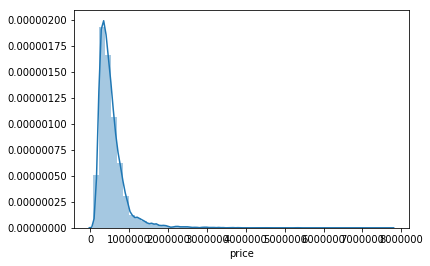

In [5]:
sns.distplot(df['price']);

Housing prices are positively skewed (aka it deviates from a normal distribution -- something that needs fixing later). Let's check out some more specific attributes.

In [6]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 4.023365
Kurtosis: 34.541359


A skewness value of 4.02 confirms that the sales price is highly skewed. 

The kurtosis is extremely high, indicating that it is leptokurtic. This confirms our plot above -- the distribution is long and the tails are flat. We have some outliers that need dealing with. 

Average: 540296.573506
Median: 450000.000000


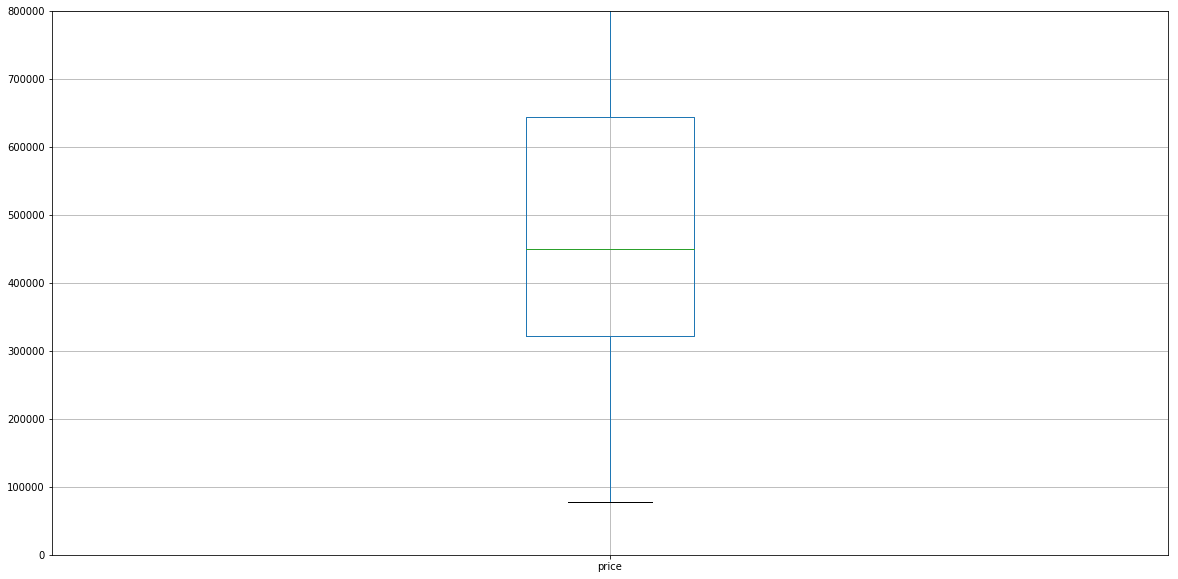

In [7]:
fig = df.boxplot('price', figsize=(20,10))
fig.axis(ymin=0, ymax=800000);

print("Average: %f" % df['price'].mean())
print("Median: %f" % df['price'].median())

The average sales price is $540,296.

The median sales price is $450,000. 

These findings fall in line with our plot showing how the distribution is postively skewed.

# Scrubbing

One of the first things we'll aim to clean is any missing data from the dataset. 

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


### Immediate Observations

We have null values in 3 features: waterfront, view, and yr_renovated.

We'll need to treated the following variables as categorical:
<br>- Waterfront (0 or 1 indicating whether or not the house is on the waterfront)
<br>- View (scale of 0-4 (how many times a house was viewed)
<br>- Condition (another scale rating what condition the house is in)
<br>- Grade (another scale quantifying the quality of the house)
<br>- Zip Code (this can be a variable that is one-hot encoded later on)

We'll likely treat the following as numerical (and be sure to check for any outliers later on): 
<br>- Bedrooms
<br>- Bathrooms
<br>- SqFt in the living space
<br>- SqFt of the lot
<br>- Floors
<br>- SqFt outside of the basement
<br>- SqFt of the basement
<br>- Year built
<br>- Year renovated (if applicable)
<br>- Latitude
<br>- Longitude

In [9]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

So we see we have missing data from the following variables:

- Waterfront
- View
- Year Renovated 

Let's check out some more specifics to determine what corrective actions need to be taken.

In [10]:
cols = ['waterfront', 'view', 'yr_renovated']
for col in cols:
    print("Value Counts for " + col + ':\n')
    print(df[col].value_counts(dropna=False).head(5), '\n')
    print("Unique values for " + col + ':\n')
    print(df[col].unique(), '\n')
    print("% of null values: ", round(((df[col].isnull().sum()/df.shape[0])*100), 2))
    print('-------------------------------\n')

Value Counts for waterfront:

 0.0    19075
NaN      2376
 1.0      146
Name: waterfront, dtype: int64 

Unique values for waterfront:

[nan  0.  1.] 

% of null values:  11.0
-------------------------------

Value Counts for view:

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64 

Unique values for view:

[ 0. nan  3.  4.  2.  1.] 

% of null values:  0.29
-------------------------------

Value Counts for yr_renovated:

 0.0       17011
NaN         3842
 2014.0       73
 2003.0       31
 2013.0       31
Name: yr_renovated, dtype: int64 

Unique values for yr_renovated:

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 19

The percentages above show that deleting waterfront/yr_renovated will cost us significant data points. However, deleting null values from view will only delete .2%. It's probably best to just delete the null values from the view category. 

In [11]:
print(df['waterfront'].unique())
19221/21597 #entries under Waterfront divided by total entries

[nan  0.  1.]


0.8899847201000138

We see from the percentage above that approximately 89% of the waterfront column isn't null. 

Therefore, we'd be deleting a lot of good data if we simply delete the column. 

In addition, it's difficult to just assume what these values should be. By replacing them with 0s or 1s, we could significantly alter the effect waterfront has on price. Therefore, our best bet is probably just deleting all the rows with null values. While we are deleting a lot of data, it still leaves us with 19,000+ data points and keeps the integrity of the waterfront column intact.

In [12]:
df = df[df.waterfront == df.waterfront]
df.shape

(19221, 21)

The cell above removed all rows that contained null values in the waterfront column. We decreased our dataset from 21,597 houses to 19,221 houses.

In [13]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1  6414100192  12/9/2014   538000.0         3       2.25         2570   
2  5631500400  2/25/2015   180000.0         2       1.00          770   
3  2487200875  12/9/2014   604000.0         4       3.00         1960   
4  1954400510  2/18/2015   510000.0         3       2.00         1680   
5  7237550310  5/12/2014  1230000.0         4       4.50         5420   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   
5    101930     1.0         0.0   0.0     ...         11        3890   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   
5         1530.0     2001           0.0    98053  47.6561 -122.005   

   sqft_living15  sqft_lot15  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  

[5 rows x 21 columns]

In [14]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Awesome! We successfully deleted the nulls from the waterfront column. Let's continue on to the view column.

In [15]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

We see from our unique values that view ranges from 0-4.

In [16]:
df['view'].isnull().sum()/df.shape[0]

0.0029655064772904634

If we delete the null values from the view column, we'll only be deleting .2% of our total data points. In this case, it's probably just easiest to do that!

In [17]:
df = df[df.view == df.view]
df['view'].value_counts()

0.0    17312
2.0      836
3.0      435
1.0      291
4.0      290
Name: view, dtype: int64

The null values from the view column are gone! Now to check out the pesky nulls in the year renovated column.

In [18]:
df['yr_renovated'].unique()

array([1991.,   nan,    0., 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1945.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 2008., 2012.,
       1968., 1963., 1951., 1962., 1953., 1993., 1955., 1996., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1965., 1967., 1934., 1972., 1944., 1958., 1974.])

In [19]:
print(df['yr_renovated'].isnull().sum()/df['yr_renovated'].notnull().sum())

0.21583555386372288


We see that over 20% of our data will be deleted if we're to delete the year renovated column. 

To start, let's change 'yr_renovated" to a categorical variable -- indicating whether or not a house was renovated at all. We'll also make the assumption that a null value indicates a house was never renovated. If a house was renovated, it was likely recorded. So we will replace null values with 0s, which indicates a house was not renovated.

In [20]:
df['yr_renovated'] = df['yr_renovated'].mask(df['yr_renovated'] > .5, 1)
df['yr_renovated'].fillna(0, inplace=True)

We changed the yr_renovated column to a categorical variable. We'll also change all null values to 0, indicated those houses were not renovated. We're now able to keep the column and keep that additional 20% of our data. 

In [21]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now that we deleted all the null values, let's fix some columns' data types.

In [22]:
df.drop(df[df['sqft_basement'] == '?'].index, inplace=True)
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [23]:
#df['zipcode'] = df['zipcode'].astype('category')
#df['view'] = df['view'].astype('category')
#df['waterfront'] = df['waterfront'].astype('category')
#df['condition'] = df['condition'].astype('category')
#df['grade'] = df['grade'].astype('category')
#df['zipcode'] = df['zipcode'].astype('category')
#df['yr_renovated'] = df['yr_renovated'].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18749 entries, 1 to 21596
Data columns (total 21 columns):
id               18749 non-null int64
date             18749 non-null object
price            18749 non-null float64
bedrooms         18749 non-null int64
bathrooms        18749 non-null float64
sqft_living      18749 non-null int64
sqft_lot         18749 non-null int64
floors           18749 non-null float64
waterfront       18749 non-null float64
view             18749 non-null float64
condition        18749 non-null int64
grade            18749 non-null int64
sqft_above       18749 non-null int64
sqft_basement    18749 non-null int64
yr_built         18749 non-null int64
yr_renovated     18749 non-null float64
zipcode          18749 non-null int64
lat              18749 non-null float64
long             18749 non-null float64
sqft_living15    18749 non-null int64
sqft_lot15       18749 non-null int64
dtypes: float64(8), int64(12), object(1)
memory usage: 3.1+ MB


Looking back, we actually don't seem to need date or the ID column, so let's delete those as well to minimize the data we're looking at.

In [25]:
df.drop(columns=['date', 'id'], axis=1, inplace=True)
df.head(4)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
1   0.0          3      7        2170            400      1951           1.0   
2   0.0          3      6         770              0      1933           0.0   
3   0.0          5      7        1050            910      1965           0.0   
4   0.0          3      8        1680              0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

While there are some categorical variables we can one-hot encode, it's easier to create some visuals in the exploratory data analysis phase so let's skip that for now. Although there's certainly going to be some more data cleaning as we explore the data, we've done enough to get started. 

# Exploratory Data Analysis

First things first, let's create some histograms to check out the initial pattern of our data and see how skewed each feature is. 

In [26]:
import warnings
warnings.filterwarnings('ignore')

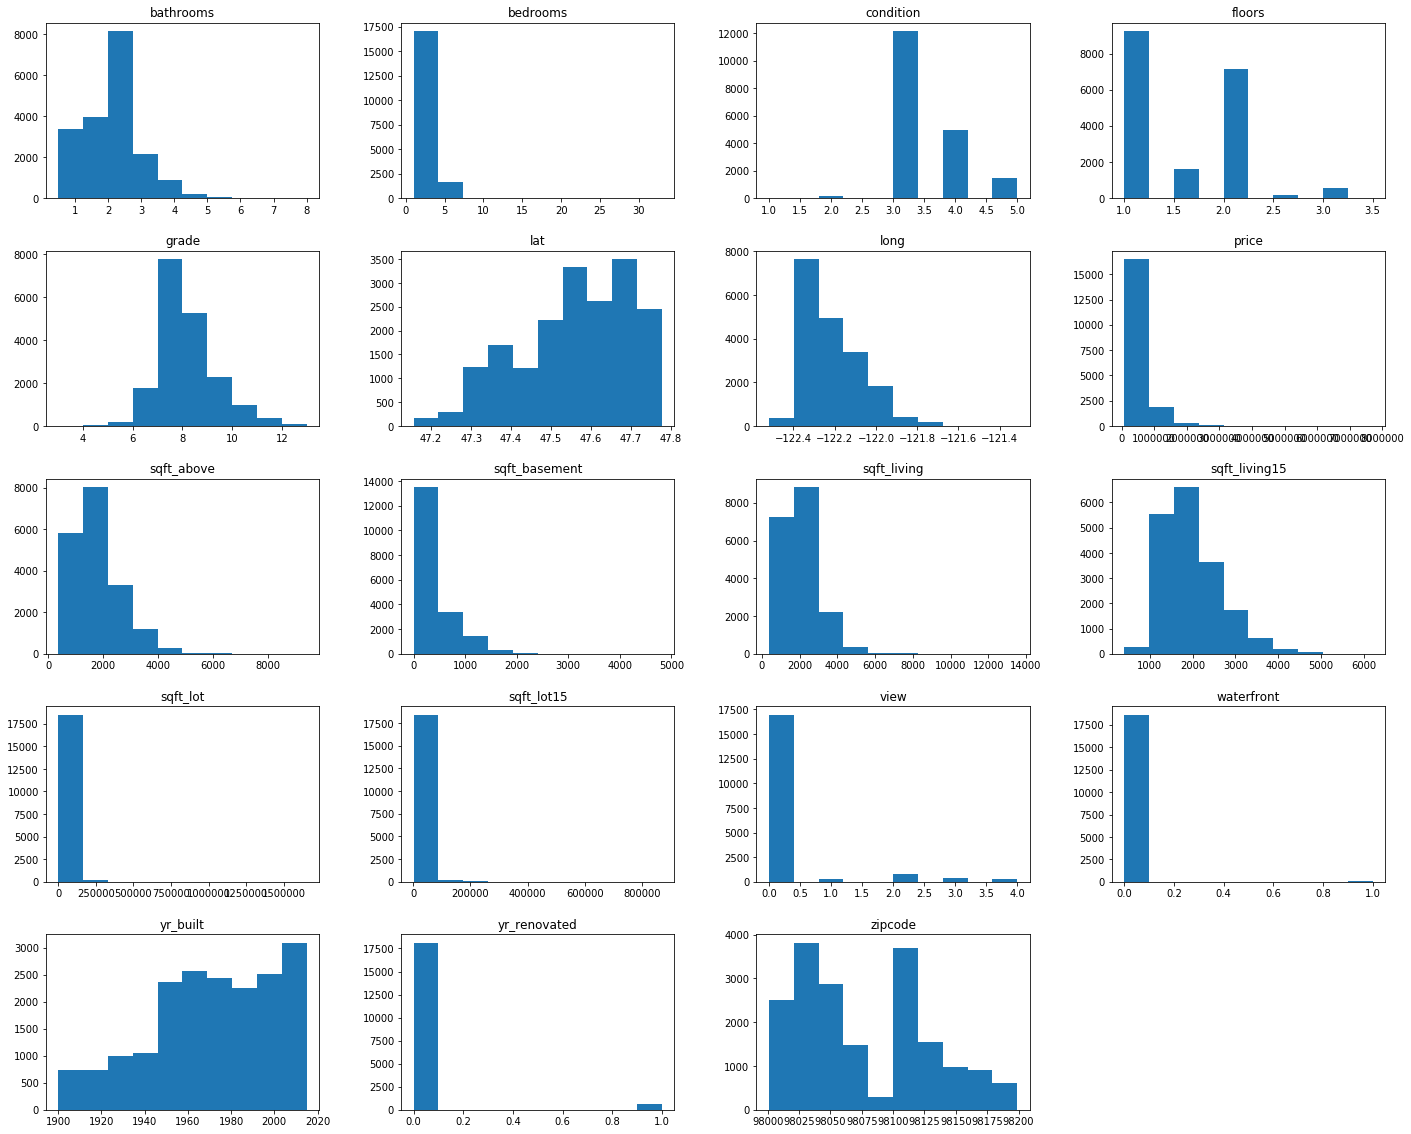

In [27]:
df.hist(figsize=(24,20), grid=False);

### Initial Observations

Bathrooms, bedrooms, floors are both ositively skewed. However, our bathroom data points look much more like a normal distribution than our bedroom data points do. 
<br>Price is VERY positively skewed and seems to have a long tail (aka a number of outliers (expensive houses) that are affecting our average sales price). This will require some further exploring if we want to modify the data and set our model up for success.
<br> Unsurprisingly, most of the square footage features have the same distribution. Each is positively skewed with a long tail (indicating a larger number of outliers). We should expect that some of the features will be deleted, as there will definitely be some multicollinearity between them. 
<br> Latitude is negatively skewed while longitude is positively skewed. Both need to be normalized. There isn't much to say about the floor data. Most houses have 1-2 floors. However, since the distribution of floors is so small for our specific dataset, we may want to consider changing this to a categorical variable.
<br> The year built feature is negatively skewed, indicating that an influx of houses were built over the past few years.

<br> Rather than rely on our own eye, let's get some more specific measurements on the skewness and kurtosis. 

## Examining the Continuous Variables

In [28]:
cols = ['bedrooms', 'bathrooms', 'floors', 'price', 'sqft_above', 'sqft_basement'
       , 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'yr_built']
for col in cols:
    print("Skewness values for " + col + ':\n')
    print(df[col].skew(), '\n')
    print("Kurtosis values for " + col + ':\n')
    print(df[col].kurt(), '\n')
    print('-------------------------------\n')

Skewness values for bedrooms:

2.244187624571679 

Kurtosis values for bedrooms:

56.96344219888979 

-------------------------------

Skewness values for bathrooms:

0.5285021675760262 

Kurtosis values for bathrooms:

1.3372747987449616 

-------------------------------

Skewness values for floors:

0.6106137903831421 

Kurtosis values for floors:

-0.49968790646923145 

-------------------------------

Skewness values for price:

4.0930927997007664 

Kurtosis values for price:

35.514598884546466 

-------------------------------

Skewness values for sqft_above:

1.4636764653166006 

Kurtosis values for sqft_above:

3.5469204452825815 

-------------------------------

Skewness values for sqft_basement:

1.603162039835526 

Kurtosis values for sqft_basement:

2.925470002468078 

-------------------------------

Skewness values for sqft_living:

1.5089498418666263 

Kurtosis values for sqft_living:

5.602403712148688 

-------------------------------

Skewness values for sqft_living1

### Immediate Observations

Bedrooms: The kurtosis value for bedrooms is HUGE! It must have some serious outliers. It's also postively skewed, so we'll need to fix this before we perform any modeling.

Bathrooms: A slight, positive skew. Nothing major, but it's high enough that we'll need to normalize it. Kurtosis value is low enough that we can ignore it. 

Price: As we saw earlier, price needs to be normalized and some outliers need to be taken care of.

As noted above (and confirmed by the skewness and kurtosis), all square footage features are positively skewed and have a leptokurtic distribution (especially the square footage of property lots).

The year built feature is negatively skewed (as more houses were built in the past two decades) and has a platykurtic distribution (lack of outliers).

## Visualizing Linear Relationships with Price using Seaborn Joint Plots

To get a better idea of each feature's relationship with price, let's use Seaborn joint plots. To help get a visual depiction of how linear each relationship is (as well as quantify their correlations and significance), we'll added fitted regression lines and pearson correlation coefficients.

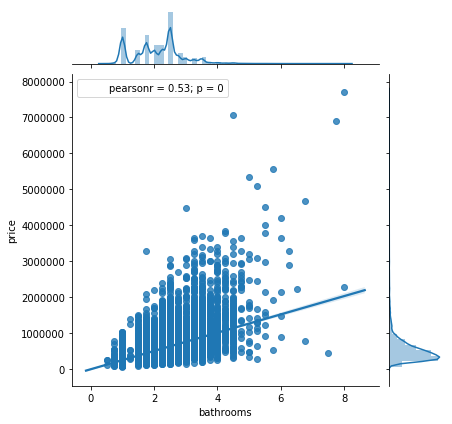

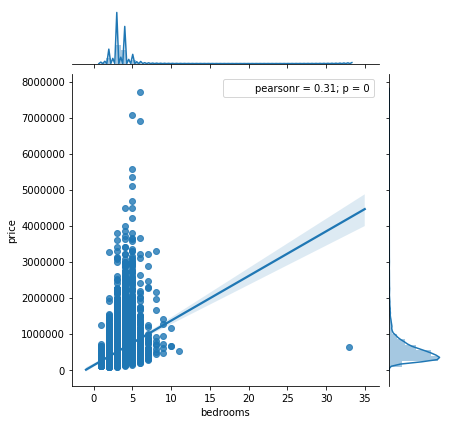

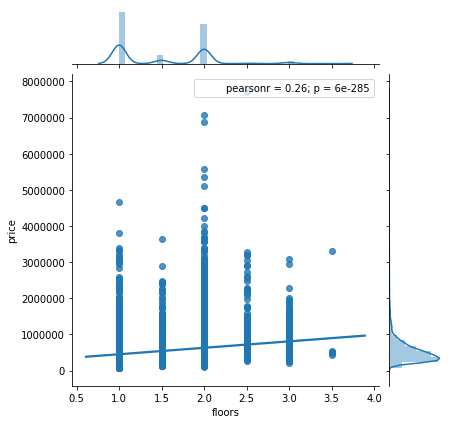

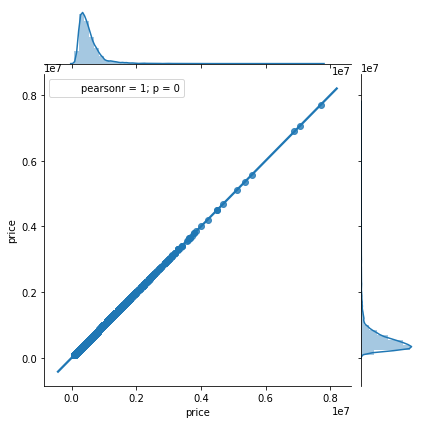

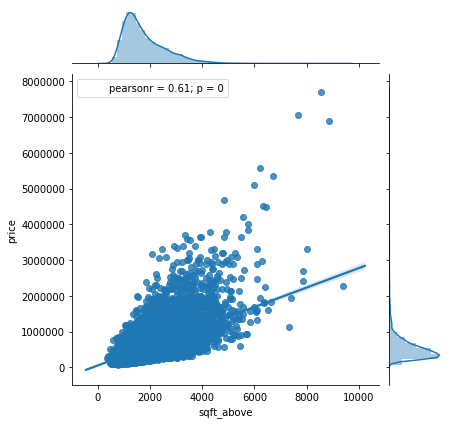

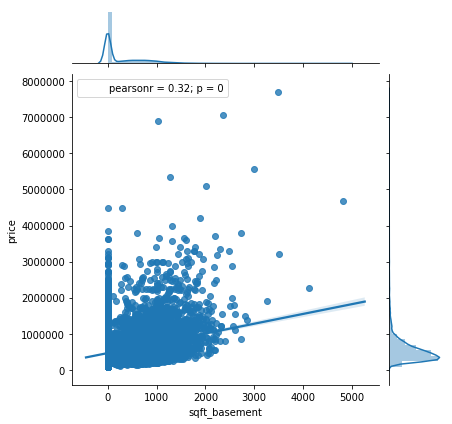

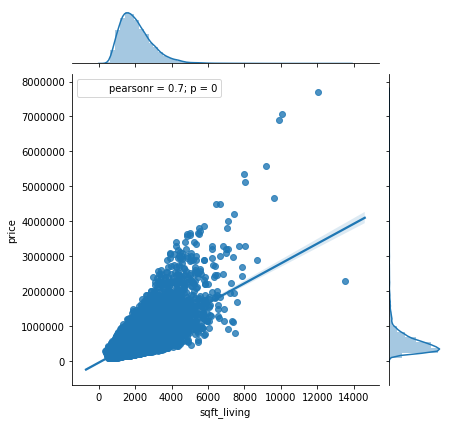

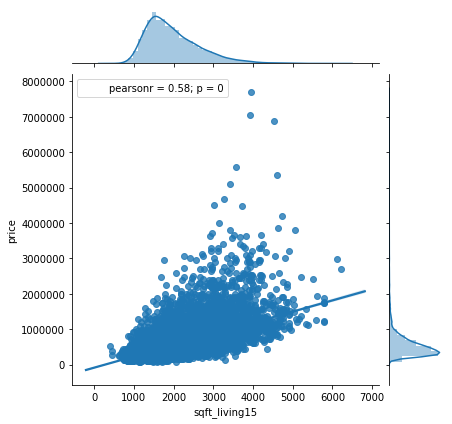

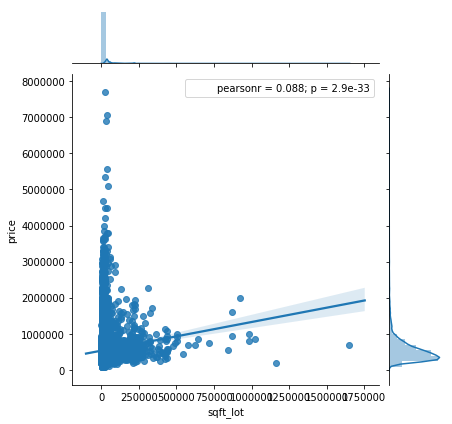

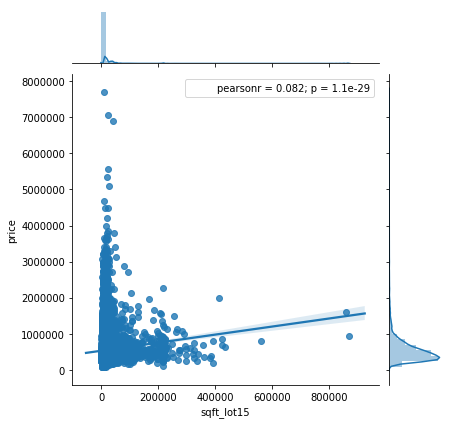

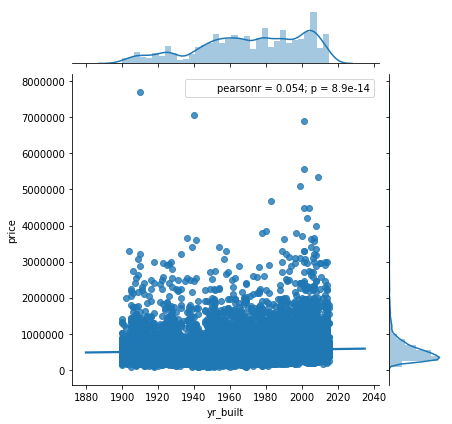

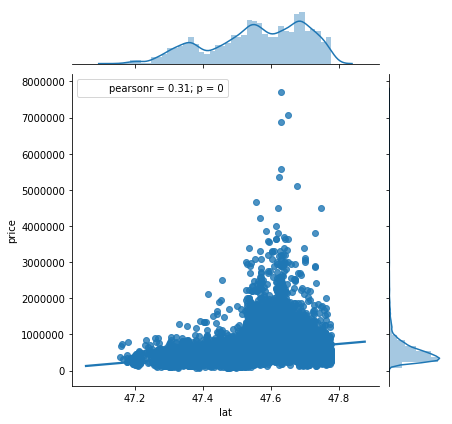

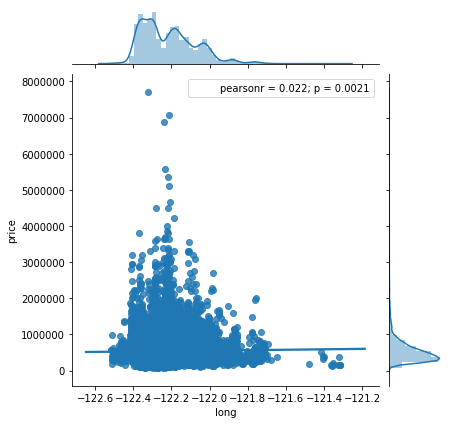

In [29]:
cont_vars = df[['bathrooms', 'bedrooms', 'floors', 'price', 'sqft_above', 'sqft_basement', 
                'sqft_living', 'sqft_living15', 'sqft_lot','sqft_lot15', 
                'yr_built', 'lat','long']]

from scipy.stats import pearsonr
for col in cont_vars:
    sns.jointplot(x=col, y='price', data=cont_vars, kind='reg', stat_func=pearsonr)

### Immediate Observations

Price: It's even clearer that some house prices are significant outliers as it is a long tailed distribution. It's also evident because our median house value is 450,000 and the average value is 541,622. 

Bathrooms: Postive correlation with price. We also see the data is bimodal. 

Bedrooms: Weak correlation with price. However, we still have that stubborn 33-bedroom home, so let's delete that and see if our Pearson coefficient improves.

Floors: An ordinal value. Weak correlation. Another bimodal feature as most of the values are 1 or 2 floors. As we see in our fitted linear regression line, the number of floors generates little impact on a home's value.

Square Footage (Above): Now we're getting somewhere! With a strong, positive correlation, we see the square footage of a home (aside from the basement) has a linear relationship with a home's value. Bigger home means pricier home is a common intuition, however, so this isn't too surprising.

Square Footage (Basement): An interesting insight here. The size of a home's basement doesn't have a positive correlation or linear relationship with the home's price. Even homes with no basement rise quite high in price. 

Square Footage (Living): No surprise. A very strong, positive correlation and an obvious linear relationship price. We'll need to investigate to see how much multicollinearity there is between this square footage variable and the others, as it's unlikely we can do modeling with all of them. 

Square Footage (Lot): Interesting note that the lot size generates no linear relationship with price. A lot of values here equal zero. We can interpret these values as apartments or townhomes, considering this means they have no yard. In addition, there are some large lots with much smaller pricetags. For all we know, these could be big, empty lots!

Year Built: Another interesting insight. Year built demonstrates no linear relationship with price. 

Latitude & Longitude: A weak correlation, but the jointplot does provide some good intel. It seems as the latitude increase, so does housing price. When we look at the map of King County, Seattle is at its northern boundary. One can make a guess that being closer to a major city increases a home's value. However, there are other factors at play here, which damper its impact. An example might be longitude, in which this could be capturing how close a house is to the water. 

## Dealing with the Outliers

To deal with the outliers are in our data, we'll need to define what an outlier is and how we translate that across all features. The easiest way to do this is to find z-scores for all data points and create a cut-off, or threshold, for where we want to delete data that deviates far from the average. 

Z-scores will help us recenter the data and look for data points that stray too far from the average (in the case of z-scores -- 0). We'll start by setting a threshold of 3 and see how many outliers that eliminates.

In [30]:
from scipy import stats

z = np.abs(stats.zscore(cont_vars))
print(z)

[[0.17231267 0.40351205 0.9359521  ... 0.68427968 1.15928992 0.74751969]
 [1.45261955 1.48182552 0.91619481 ... 1.298113   1.28110828 0.13568783]
 [1.147272   0.67480143 0.91619481 ... 0.20685376 0.28378921 1.27397966]
 ...
 [0.49729911 0.67480143 0.9359521  ... 1.46413694 0.3565919  1.05343562]
 [1.777606   1.48182552 0.9359521  ... 1.29362769 0.24673338 0.60523321]
 [1.777606   1.48182552 0.9359521  ... 1.25952583 0.24457093 0.60523321]]


Above, we converted all continuous/ordinal variables into z-scores. Now, we'll place a threshold on the z-scores to see how many outliers we identify across the data. 

If we're to use the threshold of three standard deviations to detect outliers, we'll be deleting 1,300 data points. Rather, let's increase the threshold to 4 standard deviations and see what we get. 

In this case, we'll be deleting approximately 650 data points across the 13 continuous/ordinal features. 

In [31]:
650/18749

0.034668515654168224

This amounts to 3.5% of the data points. Since this is a minor percentange of our data, let's go ahead and delete the outliers and check whether or not it affected features' correlations to price.

In [32]:
cont_vars = cont_vars[(np.abs(stats.zscore(cont_vars)) < 4).all(axis=1)]
print(cont_vars.shape)

(18101, 13)


Now that we deleted all outliers that had z-scores 4 standard deviations above the mean, we'll need to add these newly scrubbed columns back to our original dataframe and drop the old columns.

In [33]:
df.drop(['bedrooms', 'bathrooms', 'floors', 'price', 'sqft_above', 'sqft_basement'
       , 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 
         'yr_built', 'lat', 'long'], axis=1, inplace=True)

Boom! All former columns were dropped from the dataframe!

In [34]:
print(df.head())
print(cont_vars.head())

   waterfront  view  condition  grade  yr_renovated  zipcode
1         0.0   0.0          3      7           1.0    98125
2         0.0   0.0          3      6           0.0    98028
3         0.0   0.0          5      7           0.0    98136
4         0.0   0.0          3      8           0.0    98074
5         0.0   0.0          3     11           0.0    98053
   bathrooms  bedrooms  floors     price  sqft_above  sqft_basement  \
1       2.25         3     2.0  538000.0        2170            400   
2       1.00         2     1.0  180000.0         770              0   
3       3.00         4     1.0  604000.0        1050            910   
4       2.00         3     1.0  510000.0        1680              0   
8       1.00         3     1.0  229500.0        1050            730   

   sqft_living  sqft_living15  sqft_lot  sqft_lot15  yr_built      lat  \
1         2570           1690      7242        7639      1951  47.7210   
2          770           2720     10000        8062      19

Everything looks good. Let's go ahead and combine these dataframes so we begin to normalize the data and check for multicollinearity.

In [35]:
df2 = cont_vars.join(df, how='left')
df2.head()

bathrooms  bedrooms  floors     price  sqft_above  sqft_basement  \
1       2.25         3     2.0  538000.0        2170            400   
2       1.00         2     1.0  180000.0         770              0   
3       3.00         4     1.0  604000.0        1050            910   
4       2.00         3     1.0  510000.0        1680              0   
8       1.00         3     1.0  229500.0        1050            730   

   sqft_living  sqft_living15  sqft_lot  sqft_lot15  yr_built      lat  \
1         2570           1690      7242        7639      1951  47.7210   
2          770           2720     10000        8062      1933  47.7379   
3         1960           1360      5000        5000      1965  47.5208   
4         1680           1800      8080        7503      1987  47.6168   
8         1780           1780      7470        8113      1960  47.5123   

      long  waterfront  view  condition  grade  yr_renovated  zipcode  
1 -122.319         0.0   0.0          3      7           1.0    98125  
2 -122.233         0.0   0.0          3      6           0.0    98028  
3 -122.393         0.0   0.0          5      7           0.0    98136  
4 -122.045         0.0   0.0          3      8           0.0    98074  
8 -122.337         0.0   0.0          3      7           0.0    98146

All looks good! Now that outliers are deleted and we've got the remaining data all pieced back together, let's analyze if there is any multicollinearity between features.

## Checking Multicollinearity

As we perform a regression analysis, the goal is to evaluate the impact that an independent variable has on the dependent variable of interest. However, a regression analysis assumes that the average change in the dependent variable for each 1 unit change in a predictor holds all other variables constant. If predictors strongly correlate with one another, we cannot assume other variables stay constant. Therefore, it's important to check for and eliminate multicollinearity before modeling, as it can influence our coefficients. 

To understand the correlation between features, let's create a dataset that removes our dependent variable of interest (price). 

In [36]:
predictors = df2.drop(['price'], axis=1)

In [37]:
predictors.head()

bathrooms  bedrooms  floors  sqft_above  sqft_basement  sqft_living  \
1       2.25         3     2.0        2170            400         2570   
2       1.00         2     1.0         770              0          770   
3       3.00         4     1.0        1050            910         1960   
4       2.00         3     1.0        1680              0         1680   
8       1.00         3     1.0        1050            730         1780   

   sqft_living15  sqft_lot  sqft_lot15  yr_built      lat     long  \
1           1690      7242        7639      1951  47.7210 -122.319   
2           2720     10000        8062      1933  47.7379 -122.233   
3           1360      5000        5000      1965  47.5208 -122.393   
4           1800      8080        7503      1987  47.6168 -122.045   
8           1780      7470        8113      1960  47.5123 -122.337   

   waterfront  view  condition  grade  yr_renovated  zipcode  
1         0.0   0.0          3      7           1.0    98125  
2         0.0   0.0          3      6           0.0    98028  
3         0.0   0.0          5      7           0.0    98136  
4         0.0   0.0          3      8           0.0    98074  
8         0.0   0.0          3      7           0.0    98146

Great. Now it's identify how correlated the predictors are with one another and get an idea of which features we need to eliminate.

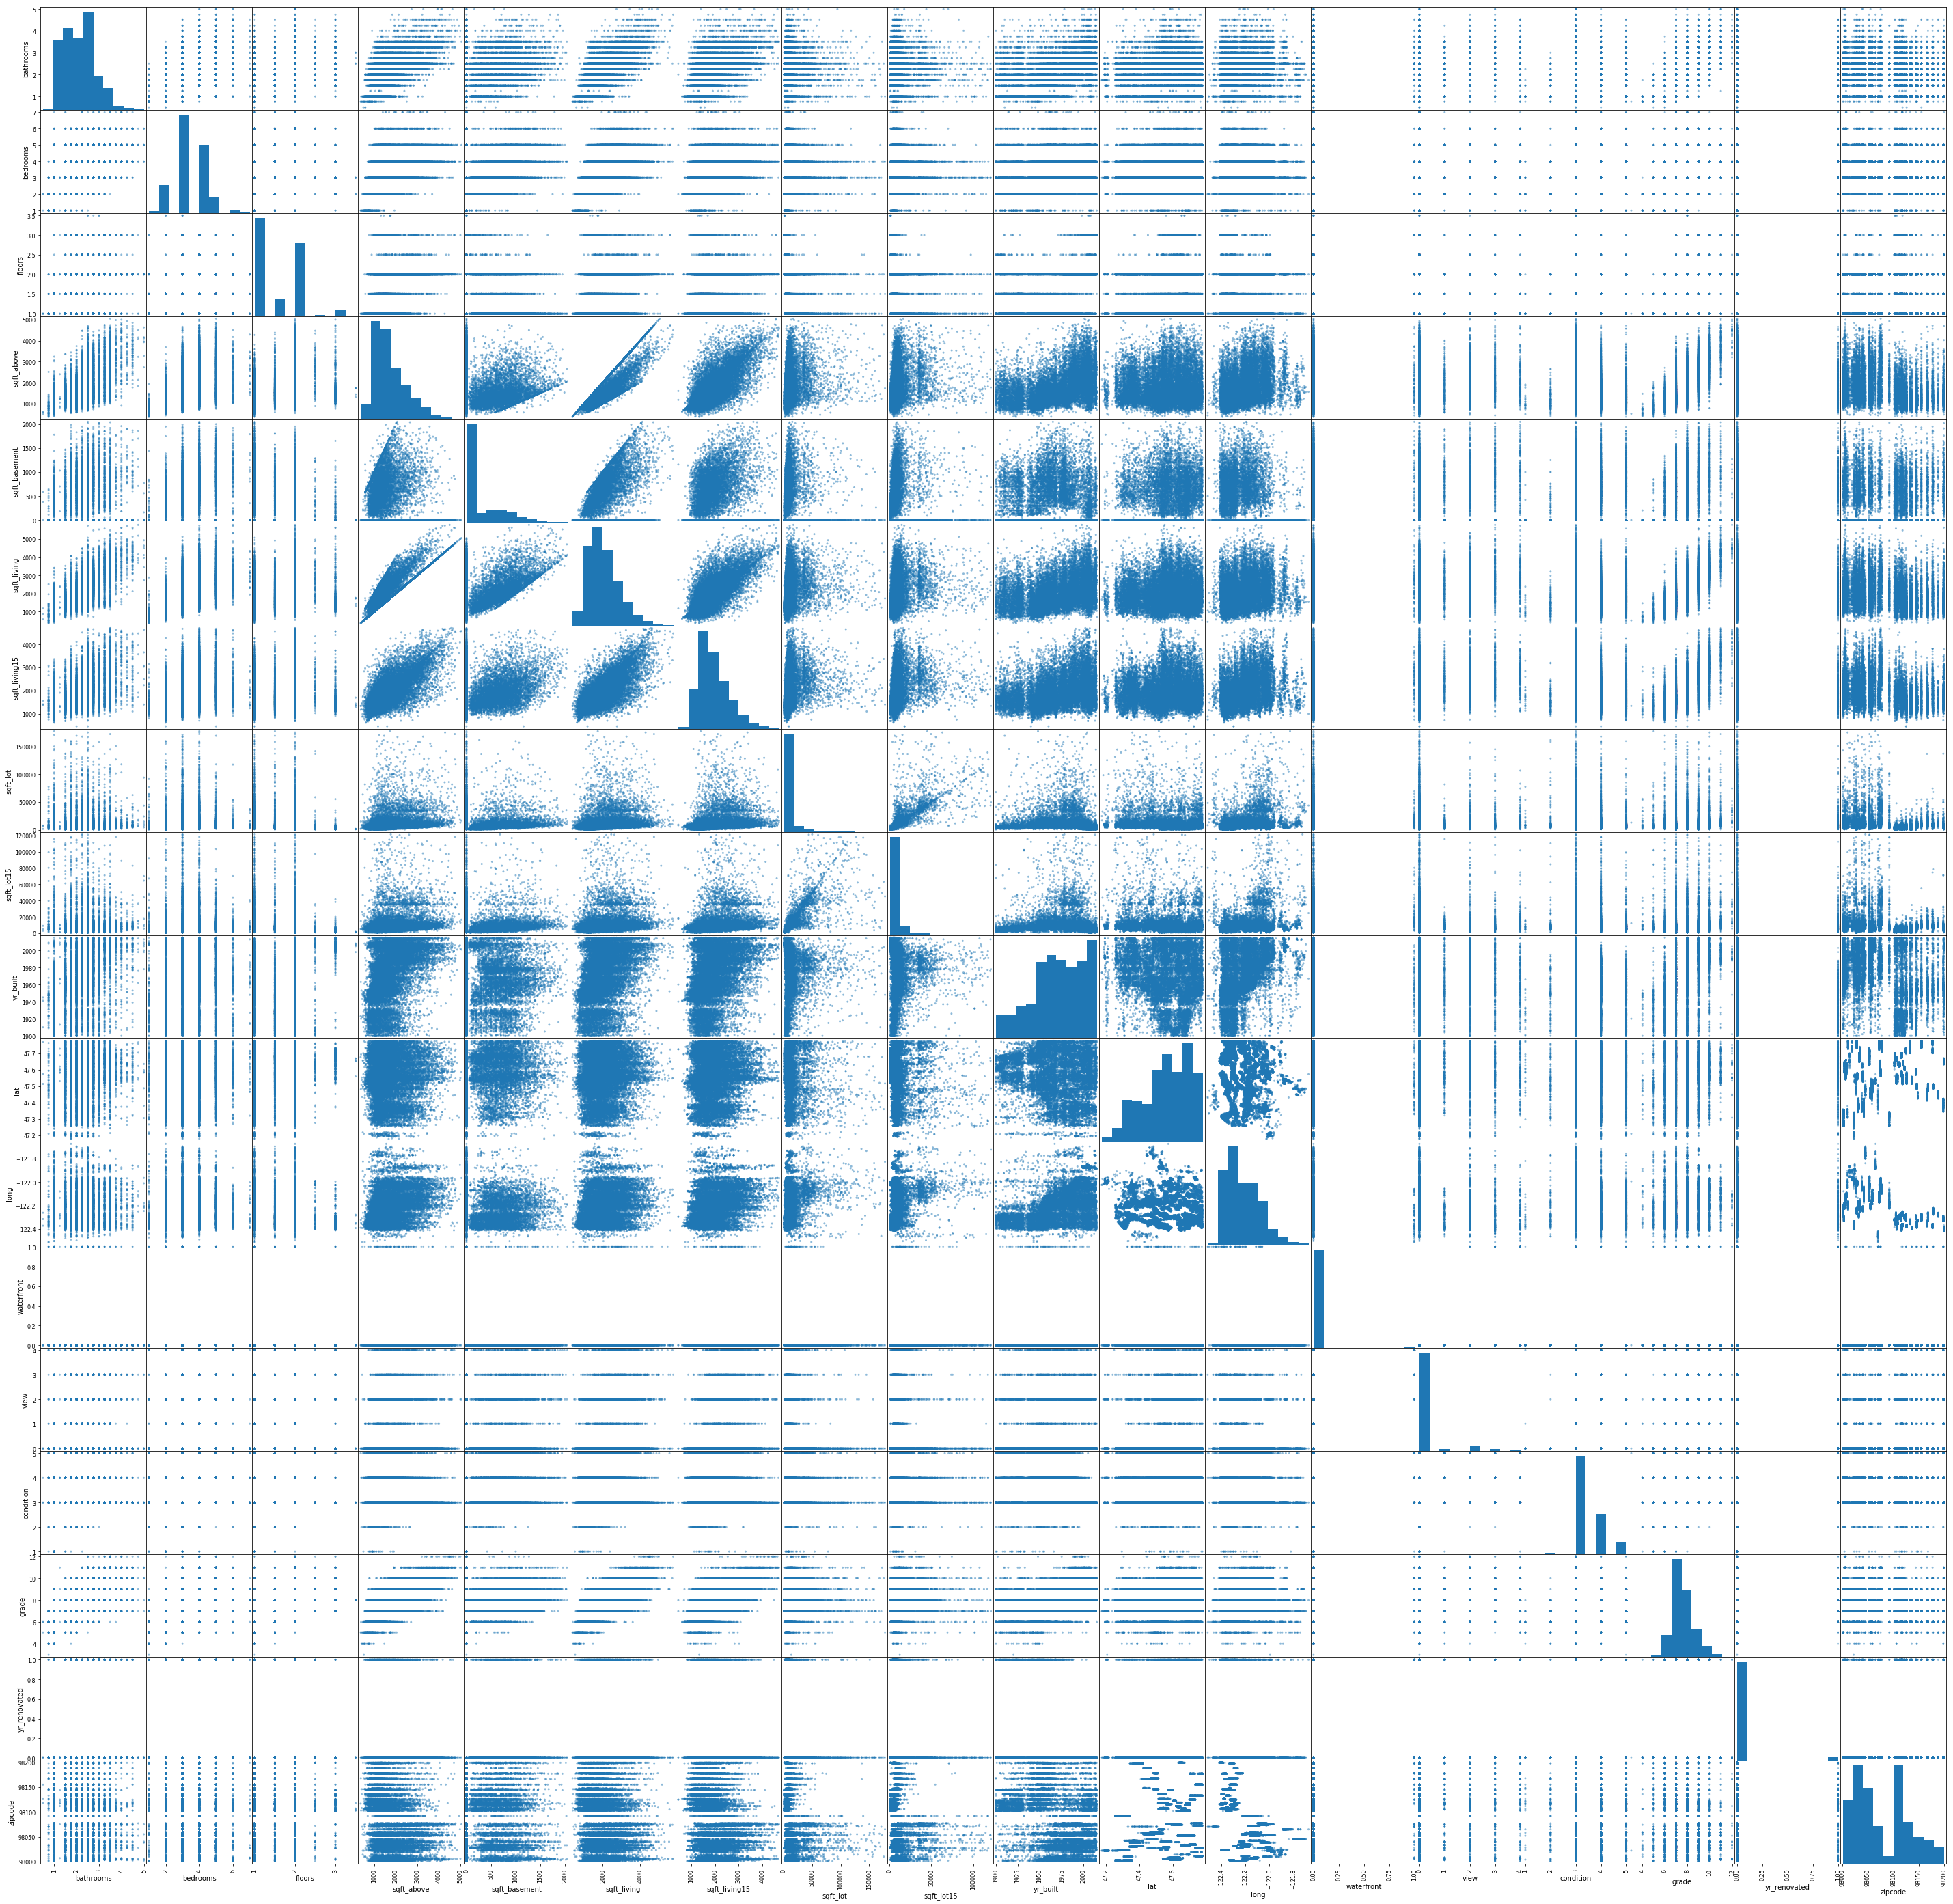

In [38]:
pd.plotting.scatter_matrix(predictors,figsize  = [50,50]);

In [39]:
predictors.corr()

bathrooms  bedrooms    floors  sqft_above  sqft_basement  \
bathrooms       1.000000  0.515622  0.516377    0.655528       0.233637   
bedrooms        0.515622  1.000000  0.179493    0.495662       0.285272   
floors          0.516377  0.179493  1.000000    0.540538      -0.274430   
sqft_above      0.655528  0.495662  0.540538    1.000000      -0.135780   
sqft_basement   0.233637  0.285272 -0.274430   -0.135780       1.000000   
sqft_living     0.730042  0.607762  0.362194    0.860994       0.386999   
sqft_living15   0.546087  0.401598  0.276607    0.724368       0.151860   
sqft_lot        0.068224  0.083474 -0.078859    0.217911       0.034617   
sqft_lot15      0.072652  0.082378 -0.082819    0.221241       0.030129   
yr_built        0.532308  0.176199  0.500979    0.446374      -0.146460   
lat             0.019712 -0.022818  0.048413   -0.002828       0.107213   
long            0.237812  0.155987  0.130713    0.366590      -0.162351   
waterfront      0.020796 -0.020633  0.008682    0.021784       0.043808   
view            0.139442  0.064118  0.013057    0.112329       0.241563   
condition      -0.134610  0.019718 -0.269502   -0.166939       0.177061   
grade           0.639831  0.359434  0.463539    0.733812       0.111393   
yr_renovated    0.038448  0.010612 -0.003585    0.010246       0.055079   
zipcode        -0.201990 -0.160801 -0.057607   -0.262645       0.094775   

               sqft_living  sqft_living15  sqft_lot  sqft_lot15  yr_built  \
bathrooms         0.730042       0.546087  0.068224    0.072652  0.532308   
bedrooms          0.607762       0.401598  0.083474    0.082378  0.176199   
floors            0.362194       0.276607 -0.078859   -0.082819  0.500979   
sqft_above        0.860994       0.724368  0.217911    0.221241  0.446374   
sqft_basement     0.386999       0.151860  0.034617    0.030129 -0.146460   
sqft_living       1.000000       0.752129  0.220581    0.221376  0.340252   
sqft_living15     0.752129       1.000000  0.250523    0.280445  0.333988   
sqft_lot          0.220581       0.250523  1.000000    0.781759  0.036198   
sqft_lot15        0.221376       0.280445  0.781759    1.000000  0.056057   
yr_built          0.340252       0.333988  0.036198    0.056057  1.000000   
lat               0.052408       0.047068 -0.069699   -0.073578 -0.148543   
long              0.257839       0.354686  0.273947    0.302894  0.416207   
waterfront        0.042764       0.050739  0.047219    0.071334 -0.035376   
view              0.228555       0.242089  0.056362    0.059414 -0.066873   
condition        -0.064472      -0.098653  0.021512    0.038424 -0.360578   
grade             0.740144       0.693931  0.141070    0.154667  0.461328   
yr_renovated      0.037812      -0.013380  0.011841    0.010446 -0.195514   
zipcode          -0.195789      -0.278358 -0.175742   -0.187293 -0.342031   

                    lat      long  waterfront      view  condition     grade  \
bathrooms      0.019712  0.237812    0.020796  0.139442  -0.134610  0.639831   
bedrooms      -0.022818  0.155987   -0.020633  0.064118   0.019718  0.359434   
floors         0.048413  0.130713    0.008682  0.013057  -0.269502  0.463539   
sqft_above    -0.002828  0.366590    0.021784  0.112329  -0.166939  0.733812   
sqft_basement  0.107213 -0.162351    0.043808  0.241563   0.177061  0.111393   
sqft_living    0.052408  0.257839    0.042764  0.228555  -0.064472  0.740144   
sqft_living15  0.047068  0.354686    0.050739  0.242089  -0.098653  0.693931   
sqft_lot      -0.069699  0.273947    0.047219  0.056362   0.021512  0.141070   
sqft_lot15    -0.073578  0.302894    0.071334  0.059414   0.038424  0.154667   
yr_built      -0.148543  0.416207   -0.035376 -0.066873  -0.360578  0.461328   
lat            1.000000 -0.140982   -0.023498  0.013343  -0.016905  0.118678   
long          -0.140982  1.000000   -0.045241 -0.093806  -0.097320  0.205524   
waterfront    -0.023498 -0.045241    1.000000  0.366940   0.014616  0.037794   
view 

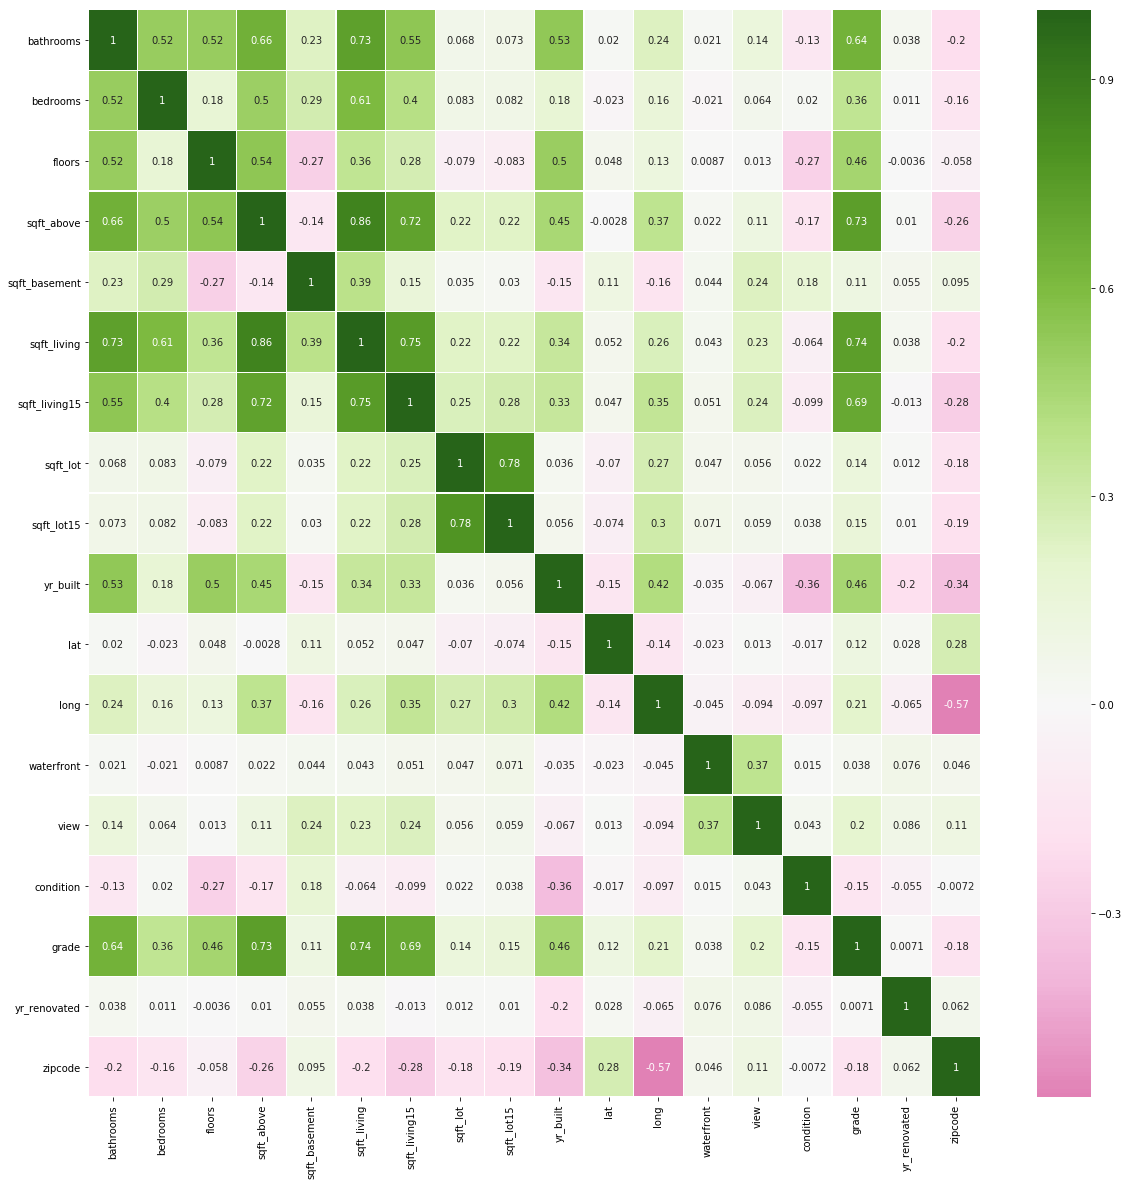

In [40]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(predictors.corr(), annot=True, cmap='PiYG' , center=0, linewidths=.25, ax=ax);

Based on the scatter matrix and our correlation chart, there are definitely some features that need to be eliminated (specifically the square footage variables).

How will we define what the threshold for multicollinearity is? Typically, a strong correlation is considered around .7 - .8, so if we use this general consensus, let's set our threshold at .70.

In [41]:
abs(predictors.corr()) > 0.70

bathrooms  bedrooms  floors  sqft_above  sqft_basement  \
bathrooms           True     False   False       False          False   
bedrooms           False      True   False       False          False   
floors             False     False    True       False          False   
sqft_above         False     False   False        True          False   
sqft_basement      False     False   False       False           True   
sqft_living         True     False   False        True          False   
sqft_living15      False     False   False        True          False   
sqft_lot           False     False   False       False          False   
sqft_lot15         False     False   False       False          False   
yr_built           False     False   False       False          False   
lat                False     False   False       False          False   
long               False     False   False       False          False   
waterfront         False     False   False       False          False   
view               False     False   False       False          False   
condition          False     False   False       False          False   
grade              False     False   False        True          False   
yr_renovated       False     False   False       False          False   
zipcode            False     False   False       False          False   

               sqft_living  sqft_living15  sqft_lot  sqft_lot15  yr_built  \
bathrooms             True          False     False       False     False   
bedrooms             False          False     False       False     False   
floors               False          False     False       False     False   
sqft_above            True           True     False       False     False   
sqft_basement        False          False     False       False     False   
sqft_living           True           True     False       False     False   
sqft_living15         True           True     False       False     False   
sqft_lot             False          False      True        True     False   
sqft_lot15           False          False      True        True     False   
yr_built             False          False     False       False      True   
lat                  False          False     False       False     False   
long                 False          False     False       False     False   
waterfront           False          False     False       False     False   
view                 False          False     False       False     False   
condition            False          False     False       False     False   
grade                 True          False     False       False     False   
yr_renovated         False          False     False       False     False   
zipcode              False          False     False       False     False   

                 lat   long  waterfront   view  condition  grade  \
bathrooms      False  False       False  False      False  False   
bedrooms       False  False       False  False      False  False   
floors         False  False       False  False      False  False   
sqft_above     False  False       False  False      False   True   
sqft_basement  False  False       False  False      False  False   
sqft_living    False  False       False  False      False   True   
sqft_living15  False  False       False  False      False  False   
sqft_lot       False  False       False  False      False  False   
sqft_lot15     False  False       False  False      False  False   
yr_built       False  False       False  False      False  False   
lat             True  False       False  False      False  False   
long           False   True       False  False      False  False   
waterfront     False  False        True  False      False  False   
view           False  False       False   True      False  False   
condition      False  False       False  False       True  False   
grade          False  False       False  False      False   True   
yr_reno

### Immediate Observations

All of the square footage variables are heavily correlate, so some will need to be dropped. In the next section, we'll inspect what property size features should be kept. 



## Question #1

Does square footage matter when purchasing a home? Specifically, does square footage matter in terms of living space, property, or both?

Before buying a home, it's important to be knowledgeable about whether or not square footage plays a factor in a home's value (both in terms of the house and the property). This can assist in the decision of whether or not to buy within cities or suburbs, and whether one should buy primarily a large home or small home.

We also ask this question in order to help inform our decision of what square footage variable to include in the final model. This analysis will lend a hand to deciding what square footage feature plays the most important feature in a home's value. 

Our features include the following:

**Square footage of the living space**
**Square footage of the basement** 
**Square footage of the living space, not including the basement**
**Square footage of the lot** 
**Square footage of the living space in 2015**
**Square footage of the lot in 2015**

Before we jump in, let's create a dataframe of just these variables. 

In [42]:
sqft = df2[['price','sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot',
            'sqft_lot15']]


We also added price to quickly run some correlations and get a chance to see how each specific measurement is correlated to home price.

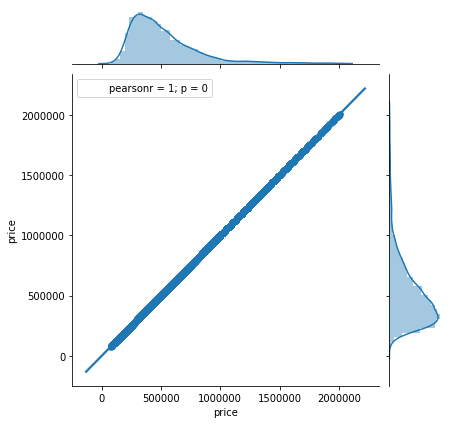

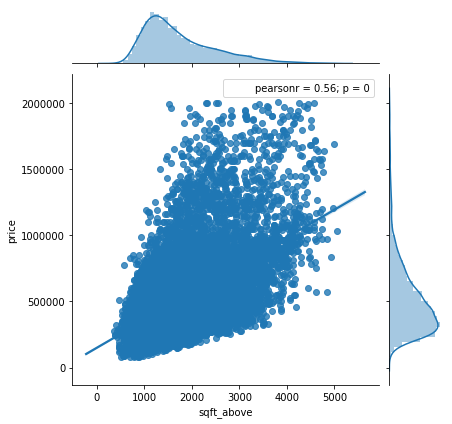

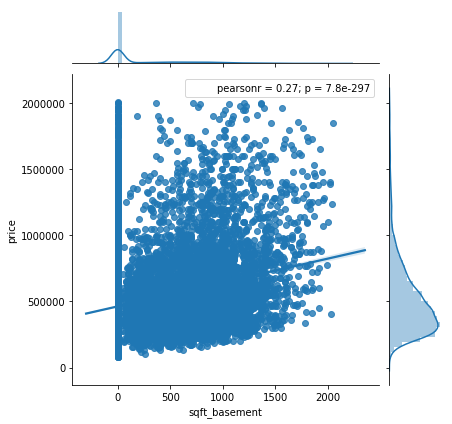

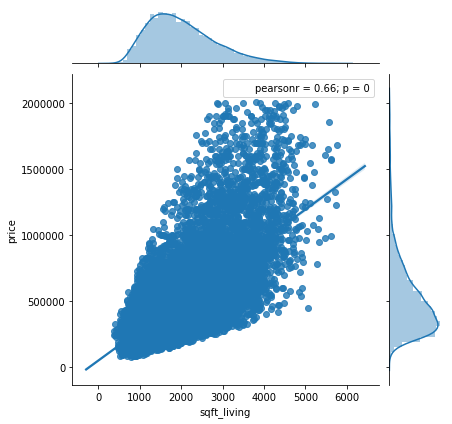

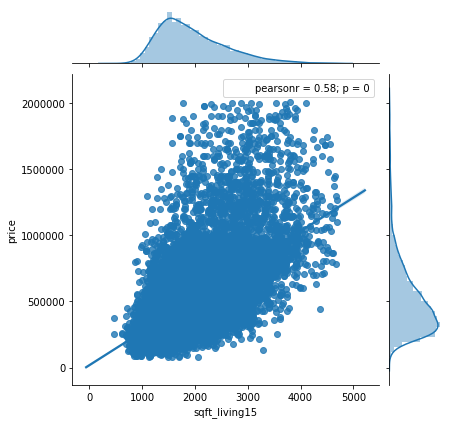

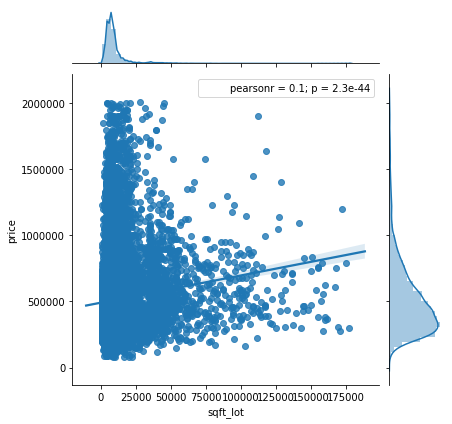

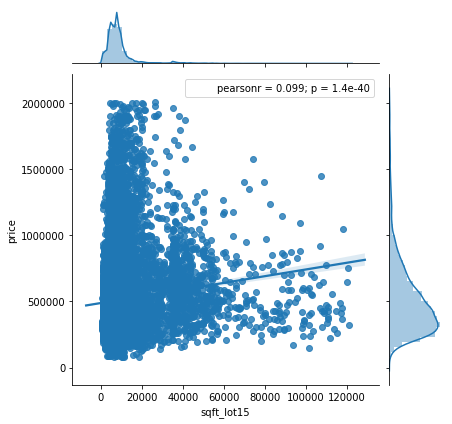

In [43]:
for col in sqft:
    sns.jointplot(x=col, y='price', data=sqft, kind='reg', stat_func=pearsonr)

Interestingly enough, we see that square footage of a living space is positively correlated with a home's price. The sqft_above feature also positively correlates with price.

The lot square footage has no correlation to price whatsoever. Assuming the lot sizes that equal zero are apartments, it's apparent that apartment value can vary greatly. From this point on, it's safe to disregard lot size. 

The basement feature seems to have a weak, positive correlation with price (it would've been valuable to have data on whether or not the basement is finished). However, it's tough to get a read on whether or not the size of the basement correlates with price when so many homes with no basements are in our data.

Out of curiosity, let's check the correlation measurement again when we eliminate homes with no basements.

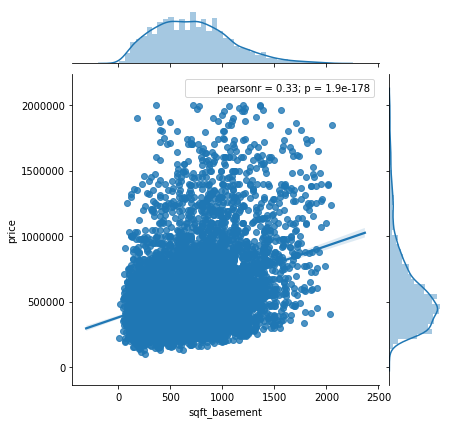

In [44]:
basement = df2[['price','sqft_basement']]
basement.drop(basement[basement['sqft_basement'] == 0].index, inplace=True)
sns.jointplot(x='sqft_basement', y='price', data=basement, kind='reg', stat_func=pearsonr)

While eliminating houses with no basements did increase the correlation with price, it still remains relatively weak. Let's disregard the basement feature and move on to the living area measurements.

### Square Footage Living v. Square Footage Above

Eliminating all other features, we leave ourselves with living space square footage and living space square footage (excluding the basement). Let's get an initial reading on the correlations between these two features and price.

In [45]:
sqft.head()
sqft = sqft.drop(['sqft_basement', 'sqft_living15', 'sqft_lot', 'sqft_lot15'], axis=1)


In [46]:
sqft.corr()

price  sqft_above  sqft_living
price        1.000000    0.562492     0.661437
sqft_above   0.562492    1.000000     0.860994
sqft_living  0.661437    0.860994     1.000000

From the analysis, we find that the entire living space square footage has a very stronger correlation with price. While the square footage of the house outside of the basement does still have a positive correlation with price, it doesn't nearly correlate as highly. This shows that disregarding basements in their entirety does lead to miscalculations. Although living space square footage correlates with a number of features, it is definitely something we want in our final model as it will likely be heavily predicted of house value.

**Our Findings**

Property square footage plays little role in a home's value. A basement isn't a make-or-break feature. Living space square footage is the most influential feature of any of our square footage measurements.

In [47]:
print("Price Skewness:", (sqft['price'].skew()))
print("Price Kurtosis:", (sqft['price'].kurt()))
print("Living Space SqFt Skewness:", (sqft['sqft_living'].skew()))
print("Living Space SqFt Kurtosis:", (sqft['sqft_living'].kurt()))

Price Skewness: 1.7677623567956724
Price Kurtosis: 4.3737995207129945
Living Space SqFt Skewness: 0.8096351381708555
Living Space SqFt Kurtosis: 0.5427766676197536


Our earlier adjustment for outliers decreased the skewness and kurtosis for both variables. However, both data is still positively skewed. This will require normalizing  both price and the square footage of the living space. However, the kurtosis scores show that our outlier adjustment significantly decreased the length of distribution tails for living space. However, it seems that the distribution tail for price is on the high side. This will be dealt with through log transformations.

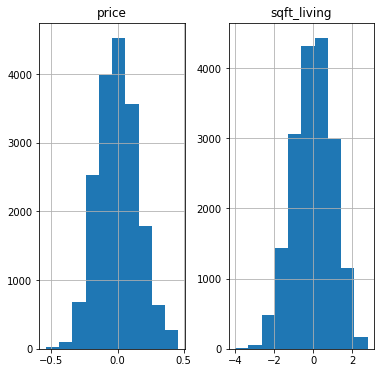

In [48]:
data_log = pd.DataFrame([])
data_log["price"] = np.log(sqft["price"])
data_log["sqft_living"] = np.log(sqft["sqft_living"])

logprice = data_log["price"]
logsqft = data_log["sqft_living"]

scaled_price = (logprice-np.mean(logprice))/(max(logprice)-min(logprice))
scaled_sqft = (logsqft-np.mean(logsqft))/np.sqrt(np.var(logsqft))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled["price"]= scaled_price
data_cont_scaled["sqft_living"]= scaled_sqft

data_cont_scaled.hist(figsize  = [6, 6]);

In [49]:
print("Price Skewness:", data_cont_scaled["price"].skew())
print("Price Kurtosis:", data_cont_scaled["price"].kurt())
print("Sqft Skewness:", data_cont_scaled["sqft_living"].skew())
print("Sqft Kurtosis:", data_cont_scaled["sqft_living"].kurt())

Price Skewness: 0.17996151721851544
Price Kurtosis: -0.017497001760833353
Sqft Skewness: -0.1772458899479632
Sqft Kurtosis: -0.28328189217260835


After scaling and log-transforming price and square foot, we can run a regression on the features to get a closer look at the relationship between price and living space square footage.

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [51]:
f = 'price~sqft_living'
model = ols(formula=f, data=data_cont_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                 1.259e+04
Date:                Sat, 02 Mar 2019   Prob (F-statistic):               0.00
Time:                        10:51:16   Log-Likelihood:                 13179.
No. Observations:               18101   AIC:                        -2.635e+04
Df Residuals:                   18099   BIC:                        -2.634e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.923e-14      0.001   3.37e-11      1.000      -0.002       0.002
sqft_living     0.0974      0.001    112.207      0.000       0.096       0.099
==============================================================================
Omnibus:                      175.660   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.142
Skew:                           0.048   Prob(JB):                     6.03e-26
Kurtosis:                       2.620   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Between the high T-score and the low P-value, we can safely assume that living space square footage plays an important part in determining a home's value. 

We intepret this coefficient as, **"The model predicts a 1% increase in living space square footage leads to an increase in price by .1%."**

## Question #2: Does zip code (city) affect a home's value?

In [52]:
zipcode = df2[['price', 'zipcode', 'grade']]
zipcode.head()

price  zipcode  grade
1  538000.0    98125      7
2  180000.0    98028      6
3  604000.0    98136      7
4  510000.0    98074      8
8  229500.0    98146      7

To make our analysis more accurate, it's likely a good idea to convert the zip codes to the actual cities they're located in. This will allow us to minimize the categories and get a better picture of what houses cost in each city. We'll also be able to tell what cities have the highest graded homes.

To obtain zip codes with matching cities, we'll be using the index provided here:
httphttps://www.zip-codes.com/county/wa-king.asp://ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?ClientCode=capitolimpact&State=wa&StName=Washington&StFIPS=53&FIPS=53033

In [53]:
zipcode['zipcode'] = zipcode['zipcode'].astype('str')

In [54]:
zipcode['zipcode'].replace('98001', 'Auburn', inplace=True)
zipcode['zipcode'].replace('98002', 'Auburn', inplace=True)
zipcode['zipcode'].replace('98003', 'Federal_Way', inplace=True)
zipcode['zipcode'].replace('98004', 'Bellevue', inplace=True)
zipcode['zipcode'].replace('98005', 'Bellevue', inplace=True)
zipcode['zipcode'].replace('98006', 'Bellevue', inplace=True)
zipcode['zipcode'].replace('98007', 'Bellevue', inplace=True)
zipcode['zipcode'].replace('98008', 'Bellevue', inplace=True)
zipcode['zipcode'].replace('98009', 'Bellevue', inplace=True)
zipcode['zipcode'].replace('98010', 'Black_Diamond', inplace=True)
zipcode['zipcode'].replace('98011', 'Bothell', inplace=True)
zipcode['zipcode'].replace('98013', 'Burton', inplace=True)
zipcode['zipcode'].replace('98014', 'Carnation', inplace=True)
zipcode['zipcode'].replace('98015', 'Bellevue', inplace=True)
zipcode['zipcode'].replace('98019', 'Duvall', inplace=True)
zipcode['zipcode'].replace('98022', 'Enumclaw', inplace=True)
zipcode['zipcode'].replace('98023', 'Federal_Way', inplace=True)
zipcode['zipcode'].replace('98024', 'Fall_City', inplace=True)
zipcode['zipcode'].replace('98025', 'Hobart', inplace=True)
zipcode['zipcode'].replace('98027', 'Issaquah', inplace=True)
zipcode['zipcode'].replace('98028', 'Kenmore', inplace=True)
zipcode['zipcode'].replace('98029', 'Issaquah', inplace=True)
zipcode['zipcode'].replace('98030', 'Kent', inplace=True)
zipcode['zipcode'].replace('98031', 'Kent', inplace=True)
zipcode['zipcode'].replace('98032', 'Kent', inplace=True)
zipcode['zipcode'].replace('98033', 'Kirkland', inplace=True)
zipcode['zipcode'].replace('98034', 'Kirkland', inplace=True)
zipcode['zipcode'].replace('98035', 'Kent', inplace=True)
zipcode['zipcode'].replace('98038', 'Maple_Valley', inplace=True)
zipcode['zipcode'].replace('98039', 'Medina', inplace=True)
zipcode['zipcode'].replace('98040', 'Mercer_Island', inplace=True)
zipcode['zipcode'].replace('98041', 'Bothell', inplace=True)
zipcode['zipcode'].replace('98042', 'Kent', inplace=True)
zipcode['zipcode'].replace('98045', 'North_Bend', inplace=True)
zipcode['zipcode'].replace('98047', 'Pacific', inplace=True)
zipcode['zipcode'].replace('98050', 'Preston', inplace=True)
zipcode['zipcode'].replace('98051', 'Ravensdale', inplace=True)
zipcode['zipcode'].replace('98052', 'Redmond', inplace=True)
zipcode['zipcode'].replace('98053', 'Redmond', inplace=True)
zipcode['zipcode'].replace('98055', 'Renton', inplace=True)
zipcode['zipcode'].replace('98056', 'Renton', inplace=True)
zipcode['zipcode'].replace('98057', 'Renton', inplace=True)
zipcode['zipcode'].replace('98058', 'Renton', inplace=True)
zipcode['zipcode'].replace('98059', 'Renton', inplace=True)
zipcode['zipcode'].replace('98062', 'Seahurst', inplace=True)
zipcode['zipcode'].replace('98063', 'Federal_Way', inplace=True)
zipcode['zipcode'].replace('98064', 'Kent', inplace=True)
zipcode['zipcode'].replace('98065', 'Snoqualmie', inplace=True)
zipcode['zipcode'].replace('98070', 'Vashon', inplace=True)
zipcode['zipcode'].replace('98071', 'Auburn', inplace=True)
zipcode['zipcode'].replace('98072', 'Woodinville', inplace=True)
zipcode['zipcode'].replace('98073', 'Redmond', inplace=True)
zipcode['zipcode'].replace('98074', 'Sammamish', inplace=True)
zipcode['zipcode'].replace('98075', 'Sammamish', inplace=True)
zipcode['zipcode'].replace('98077', 'Woodinville', inplace=True)
zipcode['zipcode'].replace('98083', 'Kirkland', inplace=True)
zipcode['zipcode'].replace('98089', 'Kent', inplace=True)
zipcode['zipcode'].replace('98092', 'Auburn', inplace=True)
zipcode['zipcode'].replace('98093', 'Federal_Way', inplace=True)
zipcode['zipcode'].replace('98101', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98102', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98103', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98104', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98105', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98106', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98107', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98108', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98109', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98111', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98112', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98113', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98114', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98115', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98116', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98117', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98118', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98119', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98121', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98122', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98124', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98125', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98126', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98127', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98129', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98131', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98133', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98134', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98136', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98138', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98139', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98141', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98144', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98145', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98146', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98148', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98154', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98155', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98158', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98160', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98161', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98164', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98165', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98166', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98168', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98170', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98174', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98175', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98177', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98178', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98181', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98185', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98188', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98190', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98191', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98194', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98195', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98198', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98199', 'Seattle', inplace=True)
zipcode['zipcode'].replace('98224', 'Baring', inplace=True)
zipcode['zipcode'].replace('98288', 'Skykomish', inplace=True)

In [55]:
zipcode['zipcode'].value_counts()

Seattle          7660
Renton           1346
Bellevue         1151
Kent             1046
Kirkland          829
Redmond           820
Auburn            763
Federal_Way       678
Sammamish         672
Issaquah          609
Maple_Valley      480
Woodinville       385
Snoqualmie        263
Kenmore           249
Mercer_Island     217
Bothell           170
Enumclaw          169
North_Bend        162
Duvall            144
Vashon             75
Black_Diamond      71
Carnation          68
Fall_City          47
Medina             27
Name: zipcode, dtype: int64

In [56]:
zipcode['zipcode'] = zipcode['zipcode'].astype('category')

Now we have a much better idea of where our data is coming from! We see the the majority of houses are in the Seattle-area. On the other end, we have 27 houses from Medina. After some research, I found that billionaires such as Bill Gates and Jeff Bezos own homes here, so we can safely assume 27 houses are pricey!

In [57]:
Medina = zipcode.loc[zipcode['zipcode'] == 'Medina']
print("The average home in Medina sold for: $", Medina['price'].mean())

The average home in Medina sold for: $ 1450555.5555555555


Well...our assumption was correct! The average home was sold for just under $1.5 million. 

Let's take a look at average home prices within each of these cities. After that, we can take a look at what the average graded home is within each city.

In [58]:
pd.set_option('float_format', '{:f}'.format)
zipcode.groupby('zipcode', as_index=False)['price'].mean().sort_values(by ='price', ascending=False)

zipcode          price
14         Medina 1450555.555556
15  Mercer_Island 1063399.612903
1        Bellevue  808963.009557
19      Sammamish  713662.976190
17        Redmond  638970.606098
12       Kirkland  611171.510253
23    Woodinville  598655.057143
9        Issaquah  587304.794745
21     Snoqualmie  518159.212928
20        Seattle  516541.802219
3         Bothell  492879.947059
22         Vashon  467609.600000
10        Kenmore  456413.453815
4       Carnation  431286.455882
5          Duvall  417537.236111
7       Fall_City  417173.829787
16     North_Bend  394806.746914
18         Renton  393595.168648
2   Black_Diamond  385730.887324
13   Maple_Valley  354177.645833
11           Kent  295155.219885
8     Federal_Way  283419.095870
0          Auburn  281358.736566
6        Enumclaw  280613.236686

We see a broad range of home values according to what city a home is located. Let's see if this list matches with the list of cities with the highest graded homes.

In [59]:
zipcode.groupby('zipcode', as_index=False)['grade'].mean().sort_values(by ='grade', ascending=False)

zipcode    grade
19      Sammamish 8.818452
15  Mercer_Island 8.801843
14         Medina 8.555556
23    Woodinville 8.332468
1        Bellevue 8.271937
9        Issaquah 8.201970
17        Redmond 8.154878
21     Snoqualmie 7.806084
3         Bothell 7.794118
12       Kirkland 7.721351
10        Kenmore 7.590361
13   Maple_Valley 7.564583
8     Federal_Way 7.551622
5          Duvall 7.534722
18         Renton 7.505944
16     North_Bend 7.382716
11           Kent 7.374761
4       Carnation 7.367647
0          Auburn 7.339450
20        Seattle 7.310444
22         Vashon 7.146667
6        Enumclaw 7.082840
2   Black_Diamond 7.070423
7       Fall_City 6.936170

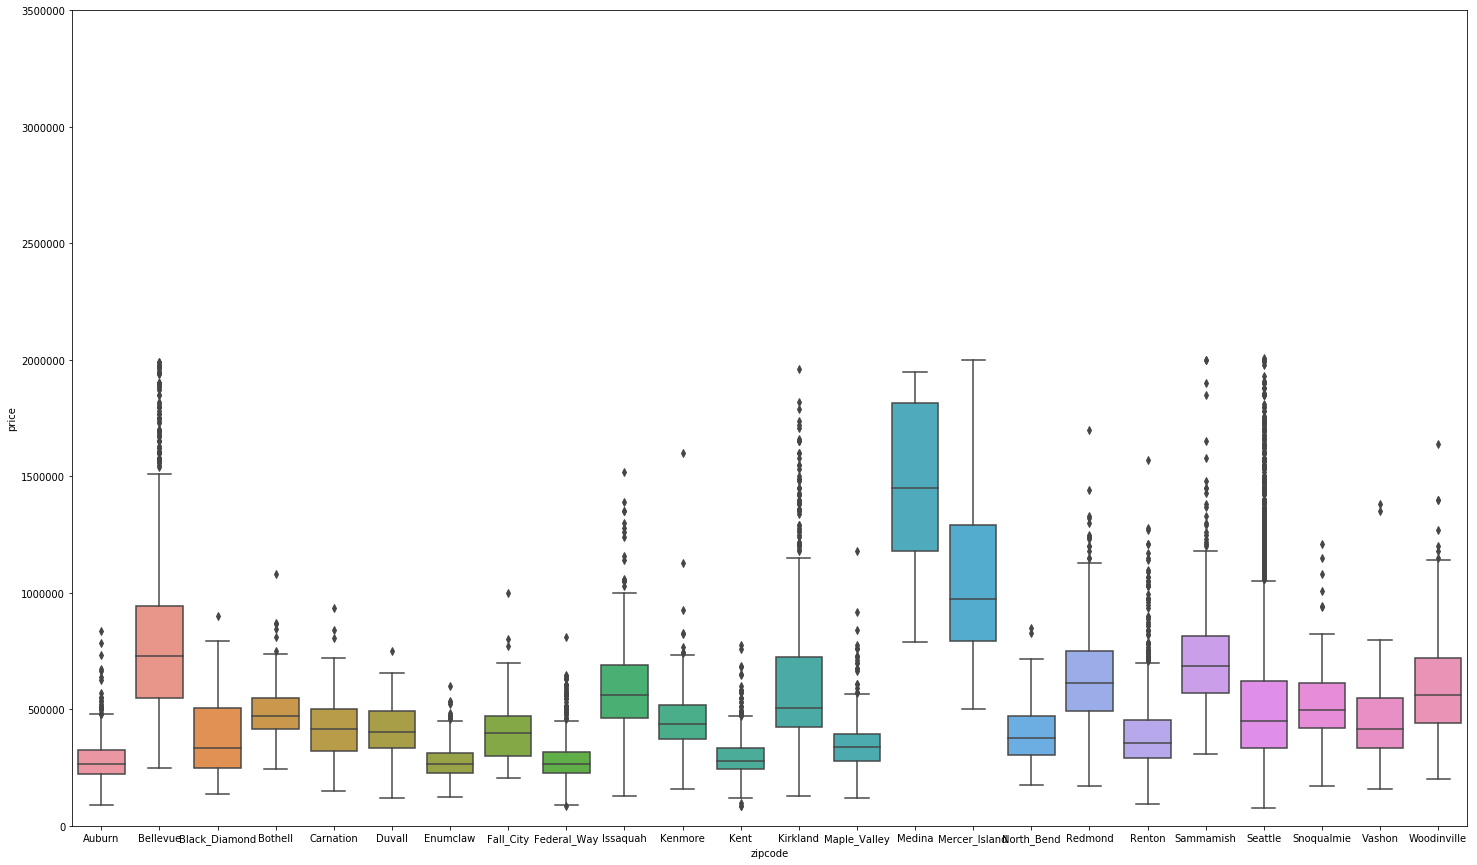

In [60]:
var = 'zipcode'
data = zipcode
f, ax = plt.subplots(figsize=(25, 15))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

**Immediate Observations**

We find that most of the expensive cities/areas also contain the highest graded homes. The five most expensive areas cities (Medina, Mercer Island, Bellevue, Sammamish, and Redmond) also had some of the highest graded homes.

Meanwhile, all the cheapest cities/neighborhoods also include some of the lowest graded homes (Enumclaw, Auburn, Federal Way, and Kent). 

Two immediate outliers: **Seattle and Vashon**

Seatte ranked as the 10th most expensive city, but finished 20th when it came to highest graded homes. One could possible infer this is due to proximity to the city: living closer to a metro area raises the cost of a home despite its inferior quality.

Vashon, on the other hand, is a remote island. Unlike Mercer, it doesn't have a bridge to the mainland. Based on the data, we found that Vashon is the 12th most expensive area, but only ranks 21st when it comes to home grade. This could likely be due to its proximity to Seattle. According to the New York Times and other sources, Vashon is only 22 minutes away from downtown Seattle and its economy is centered around commuters into Seattle.

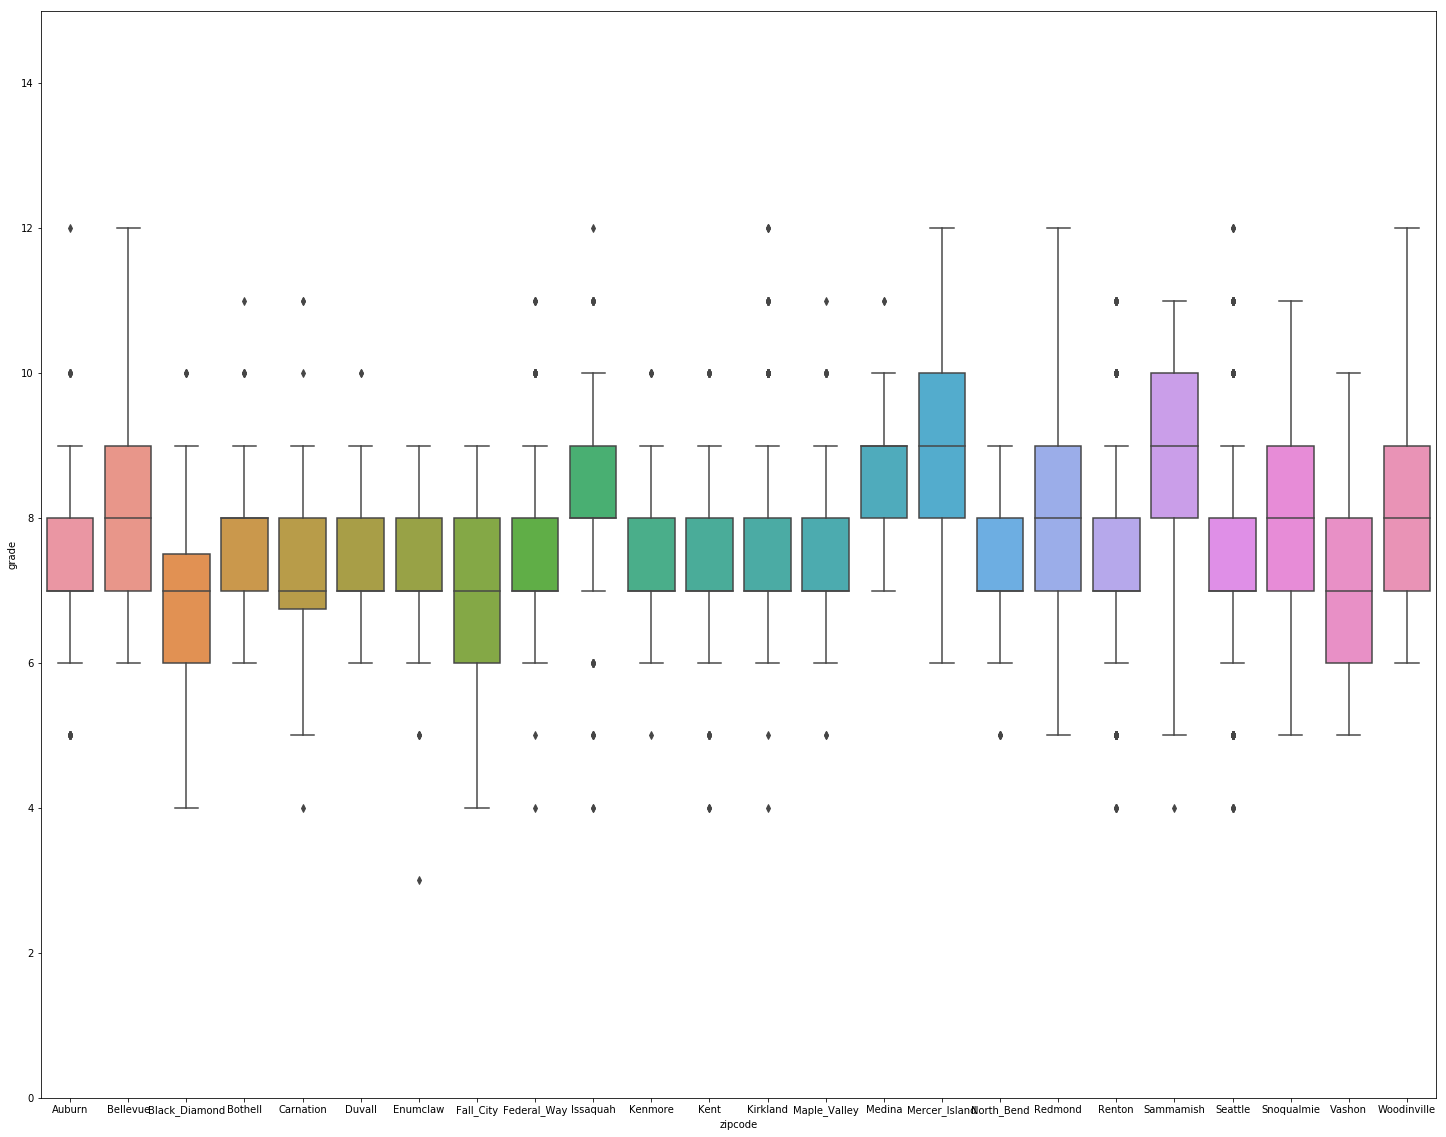

In [61]:
var = 'zipcode'
data = zipcode
f, ax = plt.subplots(figsize=(25, 20))
fig = sns.boxplot(x=var, y="grade", data=data)
fig.axis(ymin=0, ymax=15);

In [62]:
z_dummies = pd.get_dummies(zipcode['zipcode'], prefix='zip')

In [63]:
z_dummies.head()

zip_Auburn  zip_Bellevue  zip_Black_Diamond  zip_Bothell  zip_Carnation  \
1           0             0                  0            0              0   
2           0             0                  0            0              0   
3           0             0                  0            0              0   
4           0             0                  0            0              0   
8           0             0                  0            0              0   

   zip_Duvall  zip_Enumclaw  zip_Fall_City  zip_Federal_Way  zip_Issaquah  \
1           0             0              0                0             0   
2           0             0              0                0             0   
3           0             0              0                0             0   
4           0             0              0                0             0   
8           0             0              0                0             0   

        ...         zip_Medina  zip_Mercer_Island  zip_North_Bend  \
1       ...                  0                  0               0   
2       ...                  0                  0               0   
3       ...                  0                  0               0   
4       ...                  0                  0               0   
8       ...                  0                  0               0   

   zip_Redmond  zip_Renton  zip_Sammamish  zip_Seattle  zip_Snoqualmie  \
1            0           0              0            1               0   
2            0           0              0            0               0   
3            0           0              0            1               0   
4            0           0              1            0               0   
8            0           0              0            1               0   

   zip_Vashon  zip_Woodinville  
1           0                0  
2           0                0  
3           0                0  
4           0                0  
8           0                0  

[5 rows x 24 columns]

In [64]:
zipcode = zipcode.drop(['zipcode'], axis=1)
zipcode = zipcode.drop(['grade'], axis=1)

In [65]:
zipcode = pd.concat([zipcode, z_dummies], axis=1)

In [66]:
zipcode.head()

price  zip_Auburn  zip_Bellevue  zip_Black_Diamond  zip_Bothell  \
1 538000.000000           0             0                  0            0   
2 180000.000000           0             0                  0            0   
3 604000.000000           0             0                  0            0   
4 510000.000000           0             0                  0            0   
8 229500.000000           0             0                  0            0   

   zip_Carnation  zip_Duvall  zip_Enumclaw  zip_Fall_City  zip_Federal_Way  \
1              0           0             0              0                0   
2              0           0             0              0                0   
3              0           0             0              0                0   
4              0           0             0              0                0   
8              0           0             0              0                0   

        ...         zip_Medina  zip_Mercer_Island  zip_North_Bend  \
1       ...                  0                  0               0   
2       ...                  0                  0               0   
3       ...                  0                  0               0   
4       ...                  0                  0               0   
8       ...                  0                  0               0   

   zip_Redmond  zip_Renton  zip_Sammamish  zip_Seattle  zip_Snoqualmie  \
1            0           0              0            1               0   
2            0           0              0            0               0   
3            0           0              0            1               0   
4            0           0              1            0               0   
8            0           0              0            1               0   

   zip_Vashon  zip_Woodinville  
1           0                0  
2           0                0  
3           0                0  
4           0                0  
8           0                0  

[5 rows x 25 columns]

In [67]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [68]:
cols_zip = [col for col in zipcode if col.startswith('zip')]


values = [['ind_var','r_sq','int','slope','p_val']]
high_zips = []
for idx, val in enumerate(zipcode):
    print('Price ~ ' + val)
    print('--------------')
    f = 'price~' + val
    model = smf.ols(formula=f, data=zipcode,).fit()
    values.append([val, (model.rsquared).round(2), model.params[0], model.params[1], model.pvalues[1]])
    #let's only look closely at r^2 higher than .01
    if (model.rsquared).round(3) >= .01:
        print("HIGH R^2")
        print(values[idx+1])
        high_zips.append(val)
print('\n\n', 'Zipcodes with r-squared over .1:',  high_zips)
print(len(high_zips))

Price ~ price
--------------
HIGH R^2
['price', 1.0, 3.7834979593753815e-10, 1.0, 0.0]
Price ~ zip_Auburn
--------------
HIGH R^2
['zip_Auburn', 0.03, 523323.6822586227, -241964.9456924398, 2.669921385838346e-122]
Price ~ zip_Bellevue
--------------
HIGH R^2
['zip_Bellevue', 0.08, 493035.17964601784, 315927.82991088904, 0.0]
Price ~ zip_Black_Diamond
--------------
Price ~ zip_Bothell
--------------
Price ~ zip_Carnation
--------------
Price ~ zip_Duvall
--------------
Price ~ zip_Enumclaw
--------------
Price ~ zip_Fall_City
--------------
Price ~ zip_Federal_Way
--------------
HIGH R^2
['zip_Federal_Way', 0.03, 522063.05297595105, -238643.95710574338, 2.8102010463327503e-106]
Price ~ zip_Issaquah
--------------
Price ~ zip_Kenmore
--------------
Price ~ zip_Kent
--------------
HIGH R^2
['zip_Kent', 0.04, 526492.5452360013, -231337.32535072515, 7.977259135903856e-151]
Price ~ zip_Kirkland
--------------
Price ~ zip_Maple_Valley
--------------
Price ~ zip_Medina
--------------
HIGH R^2

In [69]:
new_zips = zipcode.drop(['price'], axis=1)

In [70]:
for col in new_zips:
    f = "price~" + col
    model = smf.ols(formula=f, data = zipcode).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     561.6
Date:                Sat, 02 Mar 2019   Prob (F-statistic):          2.67e-122
Time:                        10:51:23   Log-Likelihood:            -2.5246e+05
No. Observations:               18101   AIC:                         5.049e+05
Df Residuals:                   18099   BIC:                         5.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.233e+05   2096.190    249.655      0.0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     485.9
Date:                Sat, 02 Mar 2019   Prob (F-statistic):          2.81e-106
Time:                        10:51:23   Log-Likelihood:            -2.5249e+05
No. Observations:               18101   AIC:                         5.050e+05
Df Residuals:                   18099   BIC:                         5.050e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.221e+05   2095.329    2

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     888.2
Date:                Sat, 02 Mar 2019   Prob (F-statistic):          1.38e-190
Time:                        10:51:23   Log-Likelihood:            -2.5230e+05
No. Observations:               18101   AIC:                         5.046e+05
Df Residuals:                   18099   BIC:                         5.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.064e+05   2046.11

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           1.40e-09
Time:                        10:51:23   Log-Likelihood:            -2.5271e+05
No. Observations:               18101   AIC:                         5.054e+05
Df Residuals:                   18099   BIC:                         5.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.113e+05   2103.505    2

 We find nine cities/neighborhoods that might have a significant impact on price: 
 
 - Auburn
 - Bellevue
 - Federal Way
 - Kent
 - Medina
 - Mercer Island
 - Redmond
 - Renton
 - Sammamish

## Modeling

Let's set up a dataframe to use for modeling. In this initial dataframe, we'll keep our new zipcode variables, along with living space square footage, and keep some others that don't highly correlate with the aforementioned square footage feature. After we test these variables out, we'll take a look at our initial R^2 to see our results. If it isn't to our liking, we can recalibrate.

In [71]:
df2.head()
df2 = df2.drop(['zipcode', 'sqft_above', 'sqft_basement', 'sqft_living15', 
                'sqft_lot'], axis=1)

In [72]:
df2.head()

bathrooms  bedrooms   floors         price  sqft_living  sqft_lot15  \
1   2.250000         3 2.000000 538000.000000         2570        7639   
2   1.000000         2 1.000000 180000.000000          770        8062   
3   3.000000         4 1.000000 604000.000000         1960        5000   
4   2.000000         3 1.000000 510000.000000         1680        7503   
8   1.000000         3 1.000000 229500.000000         1780        8113   

   yr_built       lat        long  waterfront     view  condition  grade  \
1      1951 47.721000 -122.319000    0.000000 0.000000          3      7   
2      1933 47.737900 -122.233000    0.000000 0.000000          3      6   
3      1965 47.520800 -122.393000    0.000000 0.000000          5      7   
4      1987 47.616800 -122.045000    0.000000 0.000000          3      8   
8      1960 47.512300 -122.337000    0.000000 0.000000          3      7   

   yr_renovated  
1      1.000000  
2      0.000000  
3      0.000000  
4      0.000000  
8      0.000000

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18101 entries, 1 to 21596
Data columns (total 14 columns):
bathrooms       18101 non-null float64
bedrooms        18101 non-null int64
floors          18101 non-null float64
price           18101 non-null float64
sqft_living     18101 non-null int64
sqft_lot15      18101 non-null int64
yr_built        18101 non-null int64
lat             18101 non-null float64
long            18101 non-null float64
waterfront      18101 non-null float64
view            18101 non-null float64
condition       18101 non-null int64
grade           18101 non-null int64
yr_renovated    18101 non-null float64
dtypes: float64(8), int64(6)
memory usage: 2.7 MB


In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18101 entries, 1 to 21596
Data columns (total 14 columns):
bathrooms       18101 non-null float64
bedrooms        18101 non-null int64
floors          18101 non-null float64
price           18101 non-null float64
sqft_living     18101 non-null int64
sqft_lot15      18101 non-null int64
yr_built        18101 non-null int64
lat             18101 non-null float64
long            18101 non-null float64
waterfront      18101 non-null float64
view            18101 non-null float64
condition       18101 non-null int64
grade           18101 non-null int64
yr_renovated    18101 non-null float64
dtypes: float64(8), int64(6)
memory usage: 2.7 MB


In [75]:
df_final = pd.concat([df2, new_zips], axis=1)

In [76]:
df_final.head()
df_final = df_final.drop(['sqft_lot15'], axis=1)
df_final = df_final.drop(['bathrooms'], axis=1)  #dropping because of correlation with sqft_living

In [77]:
for col in df_final.iloc[:, 11:].columns:
    df_final[col] = df_final[col].astype('category')
df_final['yr_renovated'] = df_final['yr_renovated'].astype('category')
df_final['waterfront'] = df_final['waterfront'].astype('category')
df_final['floors'] = df_final['floors'].astype('int')
df_final['view'] = df_final['view'].astype('category')

In [78]:
data_log = pd.DataFrame([])

data_log["price"] = np.log(df_final["price"])
data_log["sqft_living"] = np.log(df_final["sqft_living"])


logprice = data_log["price"]
logsqft = data_log["sqft_living"]


scaled_price = (logprice-np.mean(logprice))/(max(logprice)-min(logprice))
scaled_sqft = (logsqft-np.mean(logsqft))/np.sqrt(np.var(logsqft))



data_final_scaled = pd.DataFrame([])
data_final_scaled["price"]= scaled_price
data_final_scaled["sqft_living"]= scaled_sqft

In [79]:
df_final = df_final.drop(['price', 'sqft_living'], axis=1)

In [80]:
df_final = pd.concat([df_final, data_final_scaled], axis=1)

In [81]:
features = df_final.drop(['price'], axis=1)

In [83]:
df_final.head()

bedrooms  floors  yr_built       lat        long waterfront     view  \
1         3       2      1951 47.721000 -122.319000   0.000000 0.000000   
2         2       1      1933 47.737900 -122.233000   0.000000 0.000000   
3         4       1      1965 47.520800 -122.393000   0.000000 0.000000   
4         3       1      1987 47.616800 -122.045000   0.000000 0.000000   
8         3       1      1960 47.512300 -122.337000   0.000000 0.000000   

   condition  grade yr_renovated     ...     zip_North_Bend zip_Redmond  \
1          3      7     1.000000     ...                  0           0   
2          3      6     0.000000     ...                  0           0   
3          5      7     0.000000     ...                  0           0   
4          3      8     0.000000     ...                  0           0   
8          3      7     0.000000     ...                  0           0   

  zip_Renton zip_Sammamish zip_Seattle zip_Snoqualmie zip_Vashon  \
1          0             0           1              0          0   
2          0             0           0              0          0   
3          0             0           1              0          0   
4          0             1           0              0          0   
8          0             0           1              0          0   

  zip_Woodinville     price sqft_living  
1               0  0.053228    0.790176  
2               0 -0.283750   -2.177074  
3               0  0.088842    0.123098  
4               0  0.036778   -0.256405  
8               0 -0.208978   -0.114059  

[5 rows x 36 columns]

In [84]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18101 entries, 1 to 21596
Data columns (total 36 columns):
bedrooms             18101 non-null int64
floors               18101 non-null int64
yr_built             18101 non-null int64
lat                  18101 non-null float64
long                 18101 non-null float64
waterfront           18101 non-null category
view                 18101 non-null category
condition            18101 non-null int64
grade                18101 non-null int64
yr_renovated         18101 non-null category
zip_Auburn           18101 non-null category
zip_Bellevue         18101 non-null category
zip_Black_Diamond    18101 non-null category
zip_Bothell          18101 non-null category
zip_Carnation        18101 non-null category
zip_Duvall           18101 non-null category
zip_Enumclaw         18101 non-null category
zip_Fall_City        18101 non-null category
zip_Federal_Way      18101 non-null category
zip_Issaquah         18101 non-null category
zip_Kenm

In [102]:
model = 'price ~ grade + waterfront + sqft_living + yr_built + lat'
smf.ols(formula=model, data=df_final).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     9369.
Date:                Sat, 02 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:58:06   Log-Likelihood:                 19966.
No. Observations:               18101   AIC:                        -3.992e+04
Df Residuals:                   18095   BIC:                        -3.987e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -18.5656      0.227    -81.957      0.000     -19.010     -18.122
waterfront[T.1.0]     0.1856      0.008     22.501      0.000       0.169       0.202
grade                 0.0614      0.001     73.311      0.000       0.060       0.063
sqft_living           0.0570      0.001     65.950      0.000       0.055       0.059
yr_built             -0.0011   2.36e-05    -45.412      0.000      -0.001      -0.001
lat                   0.4250      0.004     95.004      0.000       0.416       0.434
==============================================================================
Omnibus:                      265.740   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              485.177
Skew:                           0.073   Prob(JB):                    4.42e-106
Kurtosis:                       3.789   Cond. No.                     7.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Immediate Observations**

The R^2 value tells us that our model explains 72% of the variation in price. 

The coefficients all have a p-value of less than .05, so they are significant. An increase in latitude (living in the northern section of King County), grade, and square footage all show an increase in a home's value. Being on the waterfront also has a significant, positive impact on a home's value. 

In [103]:
df_model = df_final[['price', 'grade', 'waterfront', 'sqft_living', 'yr_built', 'lat']]

### Train-Test-Split

In order to get a good sense of how well our model will be doing on new instances, we'll have to perform a so-called "train-test-split". We'll take a sample of the data that serves as input to "train" our model - fit a linear regression and compute the parameter estimates for our variables, and calculate how well our predictive performance is doing comparing the actual targets y and the fitted ŷ obtained by our model.

In [110]:
y = df_model[["price"]]
X = df_model.drop(["price"], axis=1)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [112]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

14480 3621 14480 3621


In [113]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Let's take a look at the residuals.

In [114]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [115]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price   0.006503
dtype: float64
Test Mean Squarred Error: price   0.006232
dtype: float64


In [116]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.006503365305877629
Test Mean Squarred Error: 0.006231654389598581


Luckily, there isn't much of a difference between the MSE of the test set and the MSE of the training set.

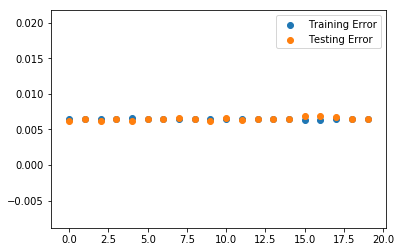

In [118]:
linreg = LinearRegression()

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

## Conclusions & Next Steps

The overall takeaways can be summarized as the following:

**1. Living space square footage is far more important than lot square footage.** - We found extensive data to support the notion that when purchasing a home, it's far more important to focus on how big the actual house/apartment is versus the property size. 

**2. The most expensive zip codes also contain the highest graded homes.** - There was extensive overlap between the most expensive areas and the areas with the highest graded homes. The two exceptions to this rule were Seattle and Vashon, which contained expensive homes but ranked toward the bottom of home grade averages.

**3. King County covers a wide variety of areas** - King County covers a diverse set of areas in Washington, including Medina (where the average home sold for 1.5 million) and Enumclaw (where the average home sold for just under 290,000). 

**4. The phrase "Location, Location, Location" holds true.** - A variety of data told us that the location of a house does, in fact, alter its value.

Based on the preliminary analysis that was conducted here, there are a lot of interesting things to investigate if we wanted to proceed further.

**1. Historical Context** - What role does the local/national economy play in a home's value? How have homes depreciated/appreciated in the county? What do the houses that gained the most value over the past ten years have in common? Does this information tell us actionable business trends?

**2. Further Exploring Location** - Does the proximity to Seattle affect home values? What about proximity to transportation centers? 

**3. Investigate Job Availabilty on Home Price** - Can we find an occurence where a major corporation placed an office in the county and see how it affected home values over the years (this could likely be rolled over into finding out how much Amazon's new headquarters in Crystal City will affect home values in the D.C. area)? 